In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
df = pd.concat([train, test], ignore_index=True, sort = False)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [6]:
df.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Outliers

In [7]:
df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [8]:
features = df.corr()['SalePrice'].sort_values(ascending=False)[1:].index

In [9]:
len(features)

37

In [10]:
target_column = 'SalePrice'

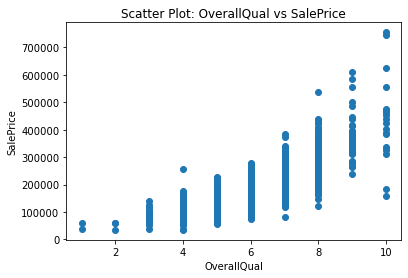

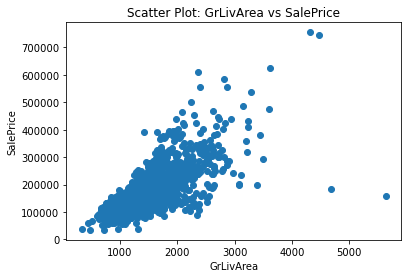

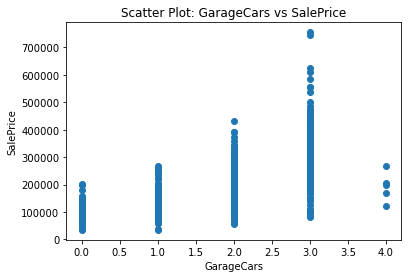

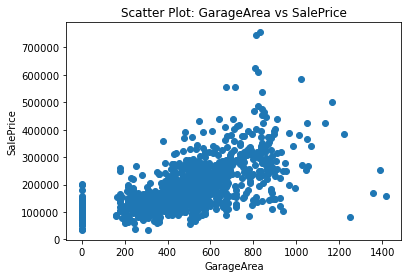

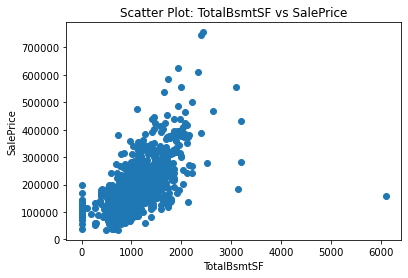

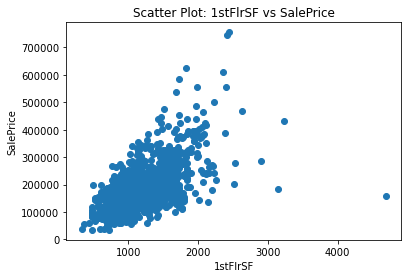

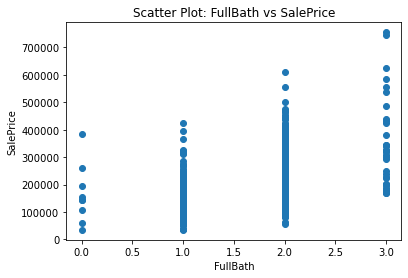

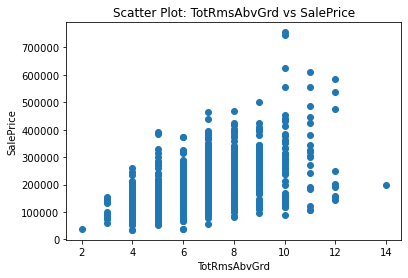

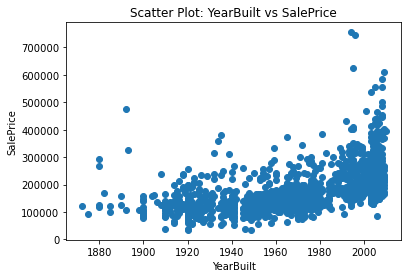

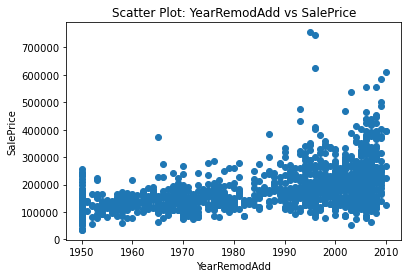

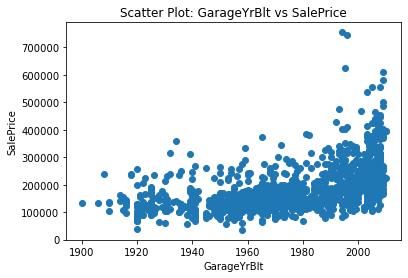

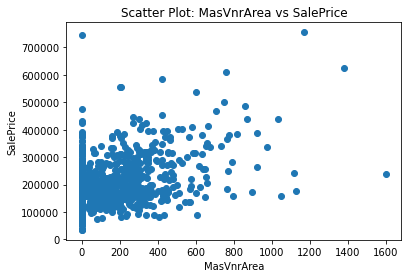

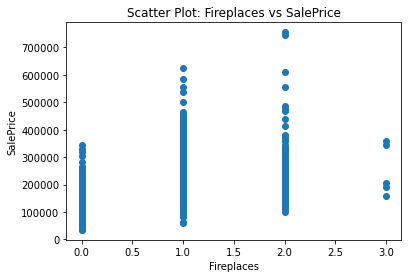

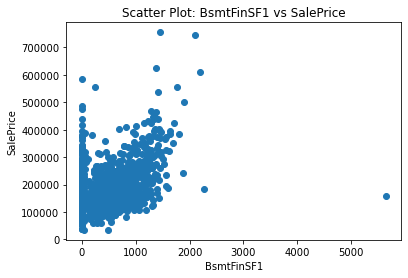

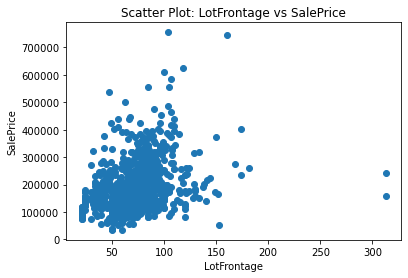

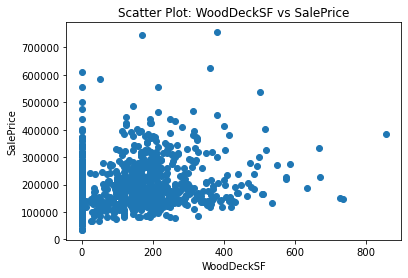

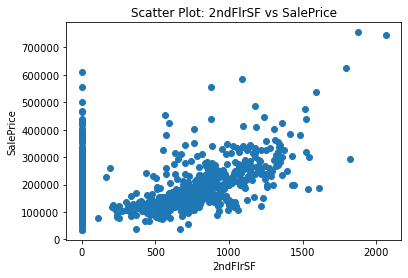

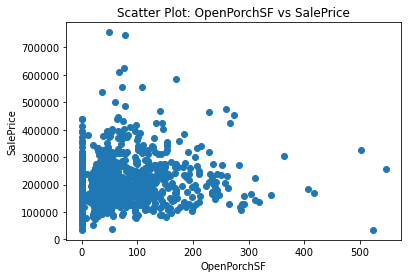

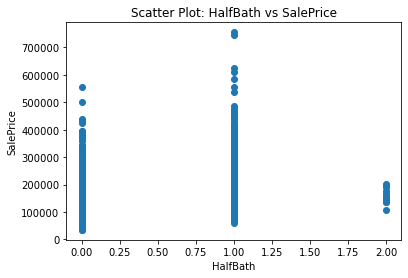

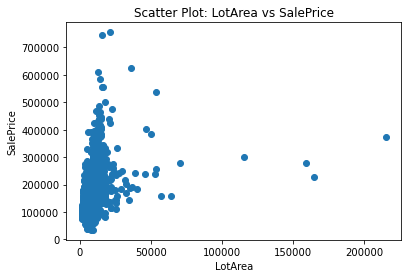

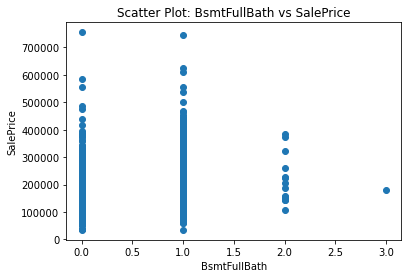

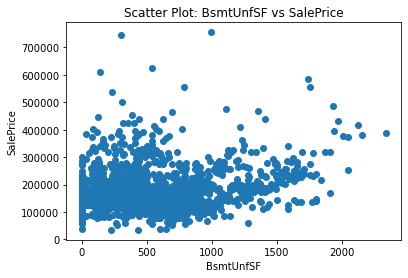

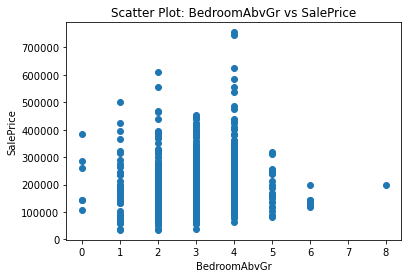

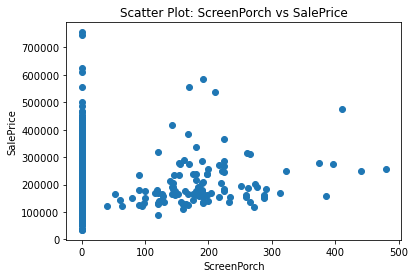

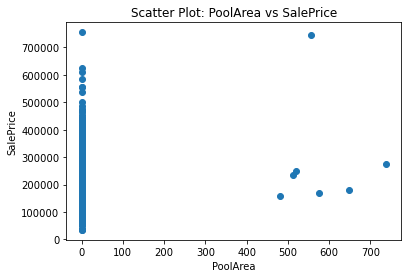

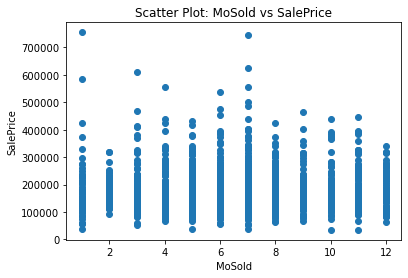

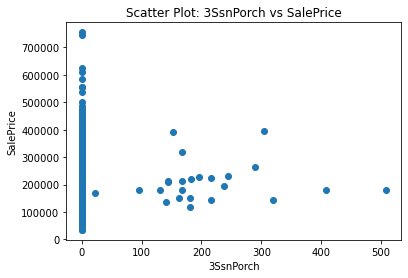

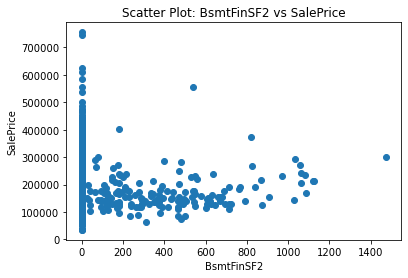

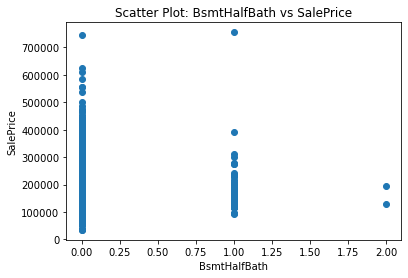

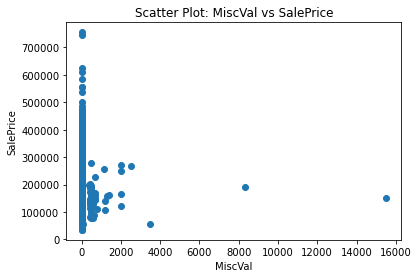

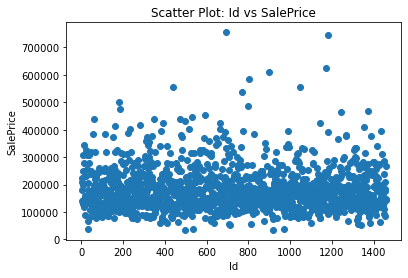

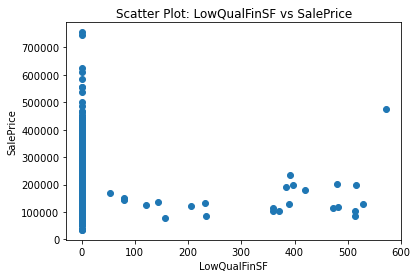

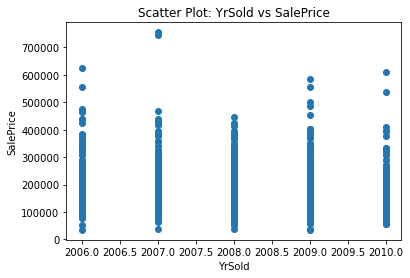

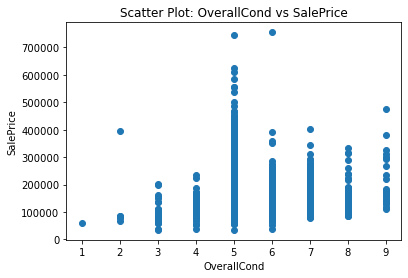

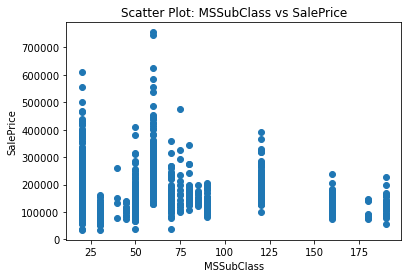

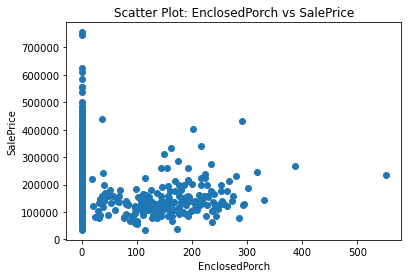

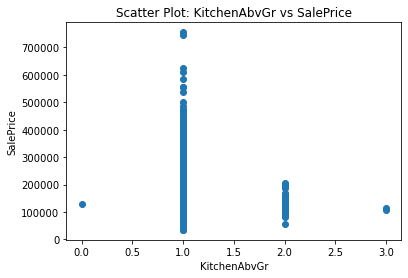

In [11]:
for feature in features:
    plt.scatter(df[feature], df[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

### OverallQual

In [12]:
df[(df['OverallQual']>8) & (df['SalePrice'] < 200000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial   184750.0  
1298      1   2008       New        Partial   160000.0  

[2 rows x 81 columns]

In [13]:
### GrLivArea

In [14]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
523      10   2007       New        Partial   184750.0  
1298      1   2008       New        Partial   160000.0  

[2 rows x 81 columns]

In [15]:
drop_ind = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index

In [16]:
df = df.drop(drop_ind, axis=0)

In [17]:
df[(df['GarageCars']==3) & (df['SalePrice'] > 700000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
691          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1182         Lvl    AllPub  ...      555     Ex  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
691       1   2007        WD         Normal   755000.0  
1182      7   2007        WD        Abnorml   745000.0  

[2 rows x 81 columns]

In [18]:
df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
581    582          20       RL         98.0    12704   Pave   NaN      Reg   
1061  1062          30  C (all)        120.0    18000   Grvl   NaN      Reg   
1190  1191         190       RL          NaN    32463   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
581          Lvl    AllPub  ...        0    NaN   NaN         NaN       0   
1061         Low    AllPub  ...        0    NaN   NaN        Shed     560   
1190         Low    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
581       8   2009       New        Partial   253293.0  
1061      8   2008     ConLD         Normal    81000.0  
1190      3   2007        WD         Normal   168000.0  

[3 rows x 81 columns]

In [19]:
drop_ind = df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)].index

In [20]:
df = df.drop(drop_ind, axis=0)

In [21]:
len(df[df['GarageArea'] == 0])

157

In [22]:
one = df[(df['LotFrontage'] > 150) & (df['SalePrice'] < 100000)]

In [23]:
two = df[(df['LotFrontage'] > 300) & (df['SalePrice'] < 300000)]

In [24]:
drop_ind = pd.concat([one,two],axis=0).index

In [25]:
drop_ind

Int64Index([1337, 934], dtype='int64')

In [26]:
df = df.drop(drop_ind, axis=0)

In [27]:
df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
495  496          30  C (all)         60.0     7879   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
495         Lvl    AllPub  ...        0    NaN  GdWo         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
495     11   2009        WD        Abnorml    34900.0  

[1 rows x 81 columns]

In [27]:
drop_ind = df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)].index

In [28]:
df = df.drop(drop_ind, axis=0)

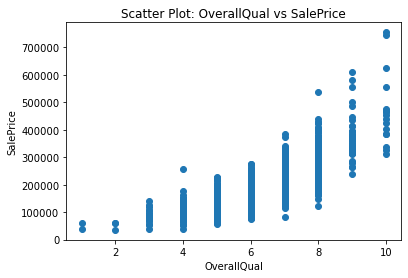

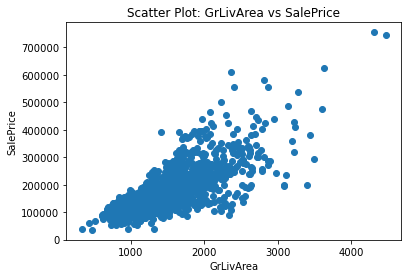

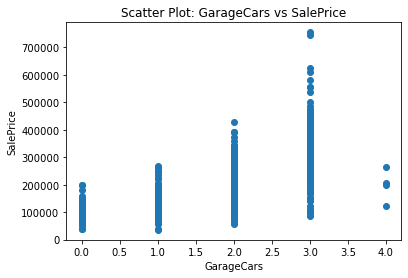

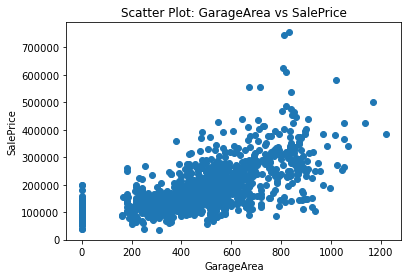

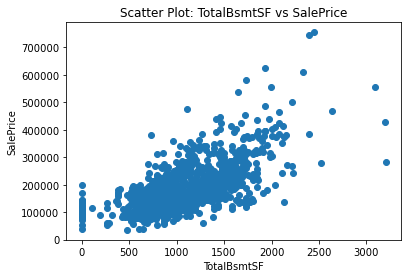

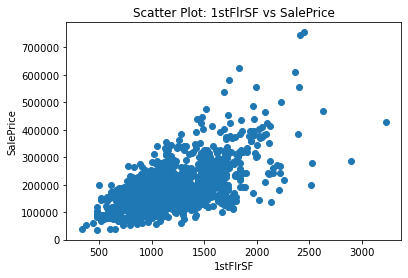

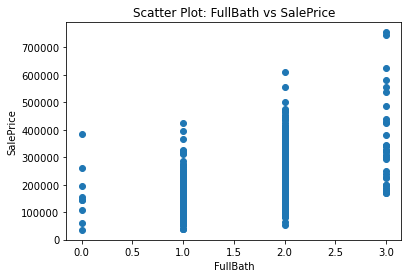

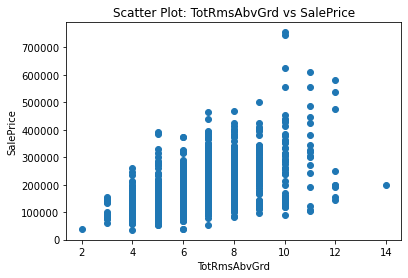

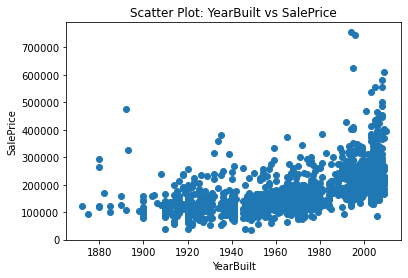

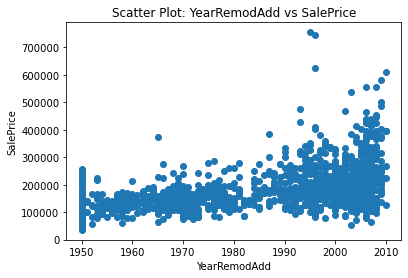

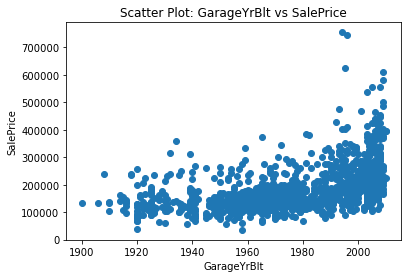

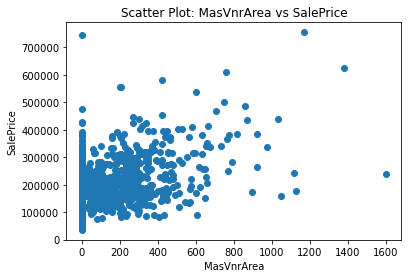

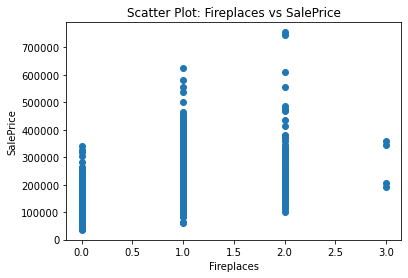

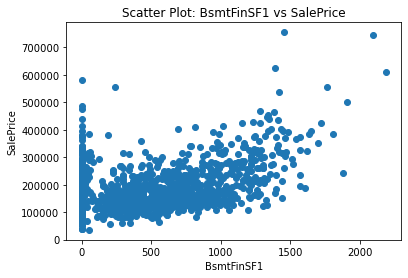

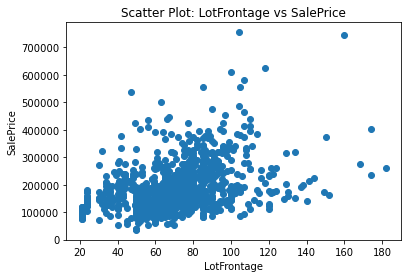

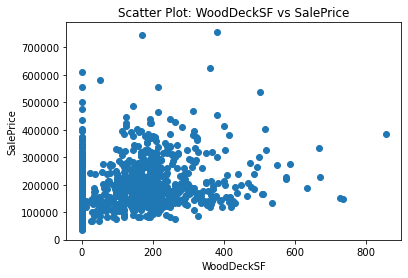

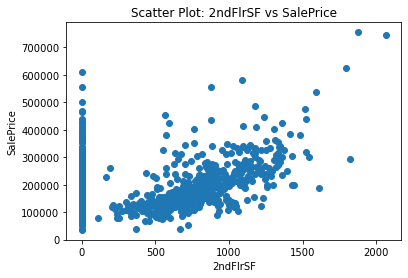

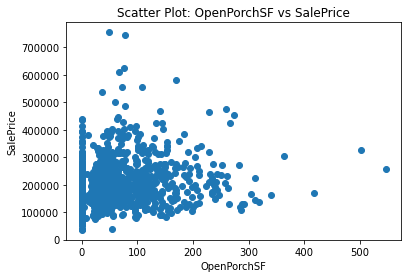

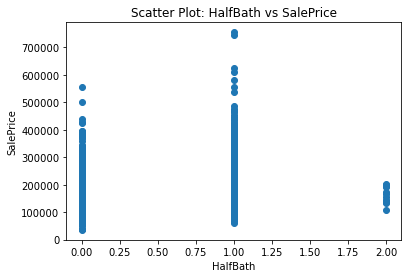

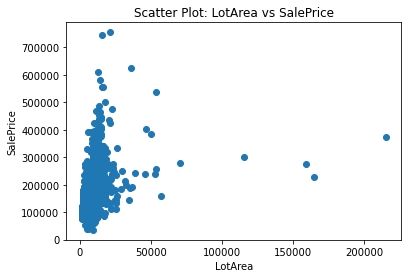

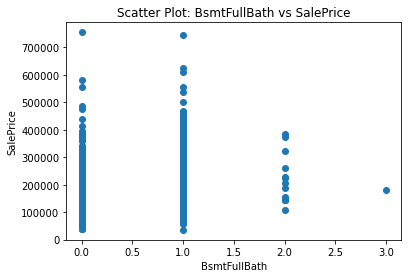

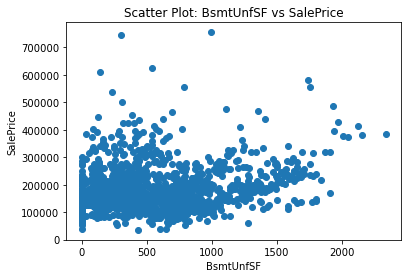

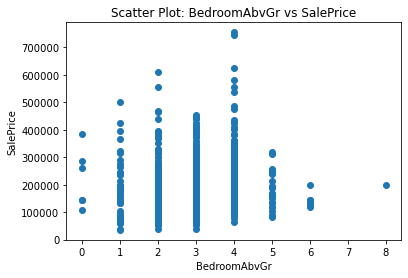

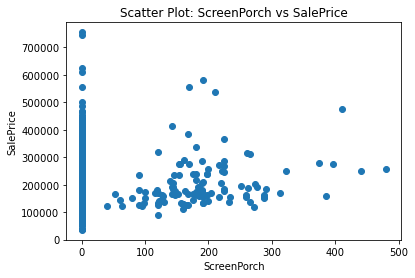

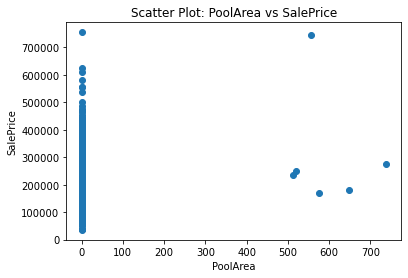

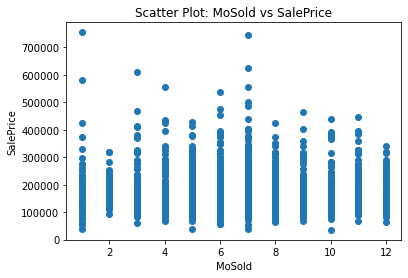

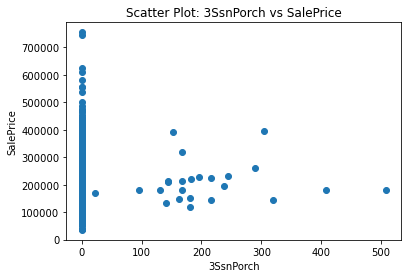

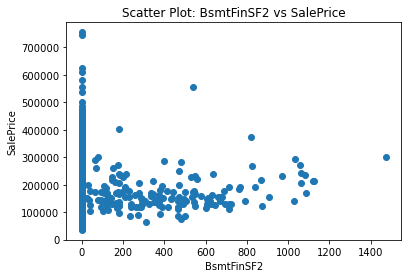

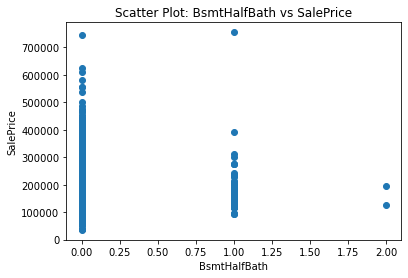

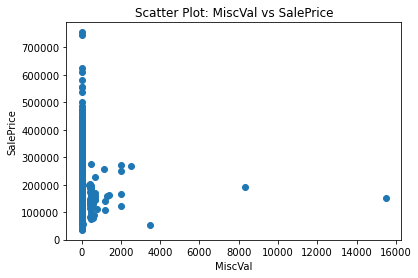

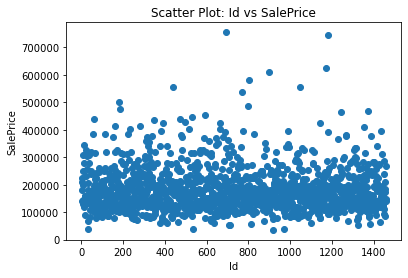

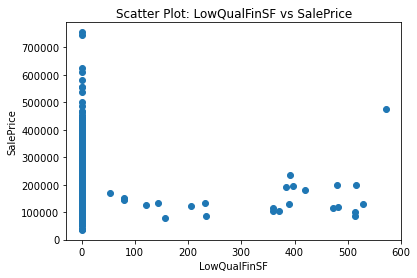

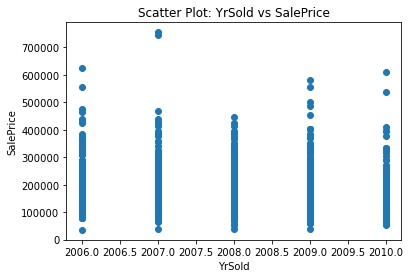

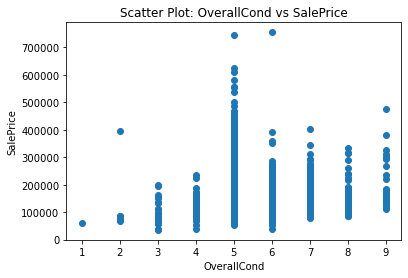

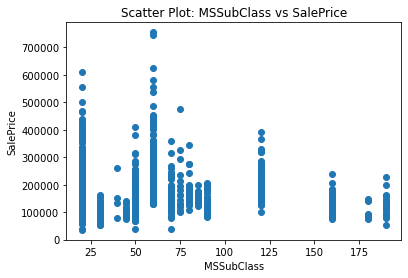

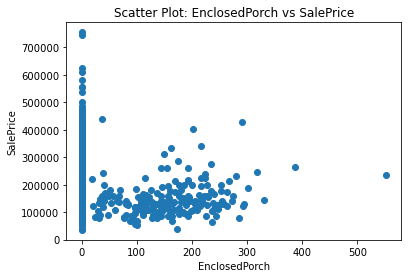

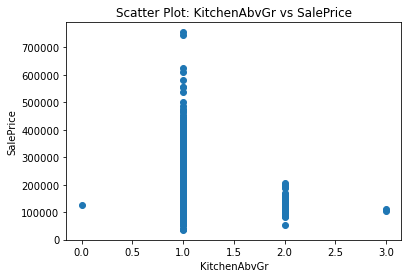

In [29]:
for feature in features:
    plt.scatter(df[feature], df[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

In [30]:
drop_ind = df[(df['TotalBsmtSF'] > 3000) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

In [31]:
drop_ind = df[df['SalePrice']>700000].index
df = df.drop(drop_ind, axis=0)

In [32]:
drop_ind = df[(df['TotRmsAbvGrd'] == 14) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

In [33]:
drop_ind = df[(df['MasVnrArea'] > 1300) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

In [34]:
drop_ind = df[(df['LotArea'] > 100000) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

In [35]:
drop_ind = df[(df['BsmtFinSF2'] > 1400) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

In [36]:
drop_ind = df[(df['MiscVal'] > 8000) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

In [37]:
drop_ind = df[(df['LowQualFinSF'] > 600) & (df['SalePrice'].notnull())].index
df = df.drop(drop_ind, axis=0)

## Missing Data

### Deleting id

In [38]:
df = df.drop('Id', axis=1)

### Creating function for checking of the null columns

In [39]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [40]:
percent_nan = percent_missing(df)

In [41]:
percent_nan[::-1]

PoolQC          99.723757
MiscFeature     96.546961
Alley           93.266575
Fence           80.386740
SalePrice       50.379834
FireplaceQu     48.860497
LotFrontage     16.540055
GarageYrBlt      5.386740
GarageFinish     5.386740
GarageQual       5.386740
GarageCond       5.386740
GarageType       5.317680
BsmtCond         2.831492
BsmtExposure     2.831492
BsmtQual         2.796961
BsmtFinType2     2.727901
BsmtFinType1     2.727901
MasVnrType       0.828729
MasVnrArea       0.794199
MSZoning         0.138122
BsmtFullBath     0.069061
BsmtHalfBath     0.069061
Functional       0.069061
Utilities        0.069061
BsmtFinSF2       0.034530
BsmtUnfSF        0.034530
BsmtFinSF1       0.034530
TotalBsmtSF      0.034530
SaleType         0.034530
KitchenQual      0.034530
Exterior2nd      0.034530
Exterior1st      0.034530
GarageCars       0.034530
GarageArea       0.034530
Electrical       0.034530
dtype: float64

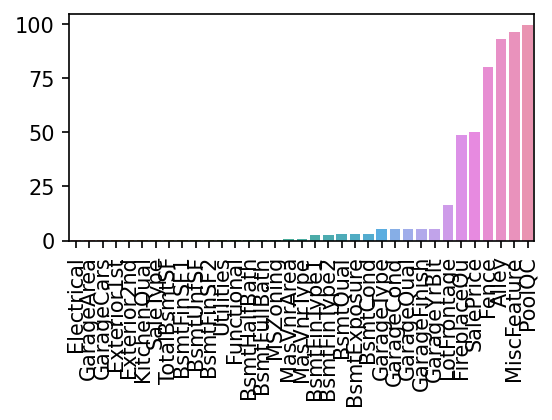

In [42]:
plt.figure(figsize=(4,2), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

(0.0, 1.0)

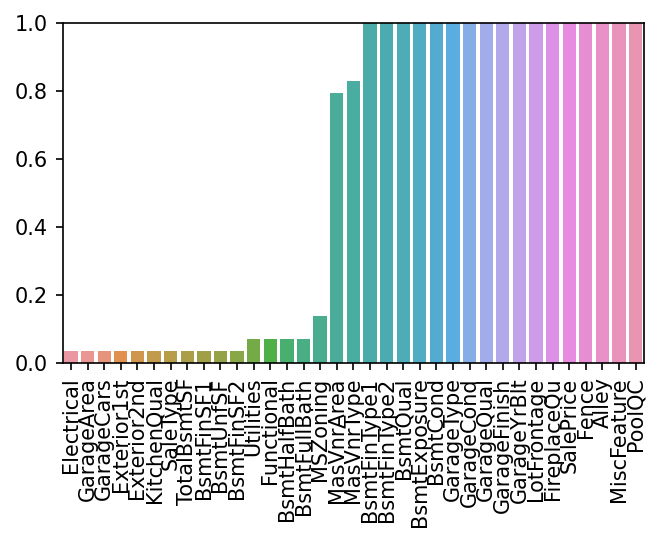

In [43]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [44]:
percent_nan[percent_nan < 1]

Electrical      0.034530
GarageArea      0.034530
GarageCars      0.034530
Exterior1st     0.034530
Exterior2nd     0.034530
KitchenQual     0.034530
SaleType        0.034530
TotalBsmtSF     0.034530
BsmtFinSF1      0.034530
BsmtUnfSF       0.034530
BsmtFinSF2      0.034530
Utilities       0.069061
Functional      0.069061
BsmtHalfBath    0.069061
BsmtFullBath    0.069061
MSZoning        0.138122
MasVnrArea      0.794199
MasVnrType      0.828729
dtype: float64

In [45]:
100/len(df)

0.034530386740331494

In [53]:
df[(df['Electrical'].isnull()) & (df['SalePrice'].notnull())]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [55]:
df['GarageArea'] = df['GarageArea'].fillna(0)

In [56]:
df[df['GarageArea'].isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [52]:
df = df.dropna(axis=0,subset= ['Electrical'])

In [57]:
percent_nan = percent_missing(df)

In [58]:
percent_nan[percent_nan < 1]

TotalBsmtSF     0.034542
GarageCars      0.034542
Exterior1st     0.034542
Exterior2nd     0.034542
KitchenQual     0.034542
SaleType        0.034542
BsmtUnfSF       0.034542
BsmtFinSF2      0.034542
BsmtFinSF1      0.034542
Functional      0.069085
Utilities       0.069085
BsmtHalfBath    0.069085
BsmtFullBath    0.069085
MSZoning        0.138169
MasVnrArea      0.794473
MasVnrType      0.829016
dtype: float64

(0.0, 1.0)

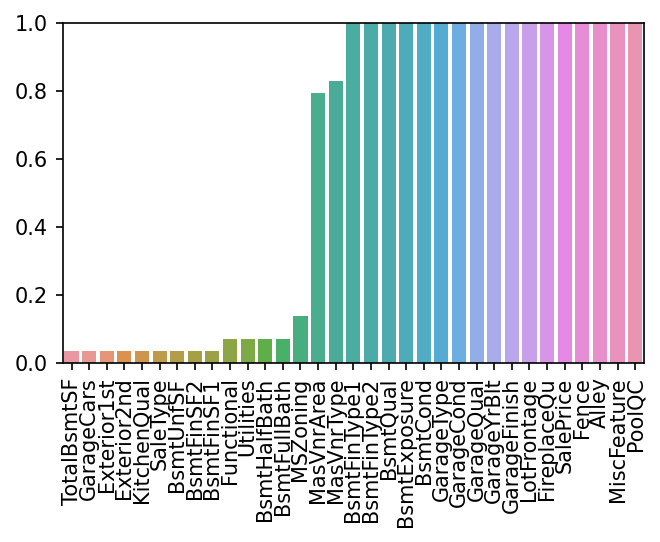

In [59]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [60]:
df[df['BsmtHalfBath'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2120          20       RM         99.0     5940   Pave   NaN      IR1   
2188          20       RL        123.0    47007   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
2120         Lvl    AllPub       FR3  ...        0    NaN  MnPrv         NaN   
2188         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
2120       0      4    2008     ConLD        Abnorml        NaN  
2188       0      7    2008        WD         Normal        NaN  

[2 rows x 80 columns]

In [61]:
df[df['BsmtFullBath'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2120          20       RM         99.0     5940   Pave   NaN      IR1   
2188          20       RL        123.0    47007   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
2120         Lvl    AllPub       FR3  ...        0    NaN  MnPrv         NaN   
2188         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
2120       0      4    2008     ConLD        Abnorml        NaN  
2188       0      7    2008        WD         Normal        NaN  

[2 rows x 80 columns]

In [62]:
df[df['BsmtUnfSF'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2120          20       RM         99.0     5940   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
2120         Lvl    AllPub       FR3  ...        0    NaN  MnPrv         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
2120       0      4    2008     ConLD        Abnorml        NaN  

[1 rows x 80 columns]

In [63]:
bsmt_num_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)

In [64]:
bsmt_str_cols =  ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

In [65]:
df[df['BsmtHalfBath'].isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 80 columns]

In [66]:
percent_nan = percent_missing(df)

(0.0, 1.0)

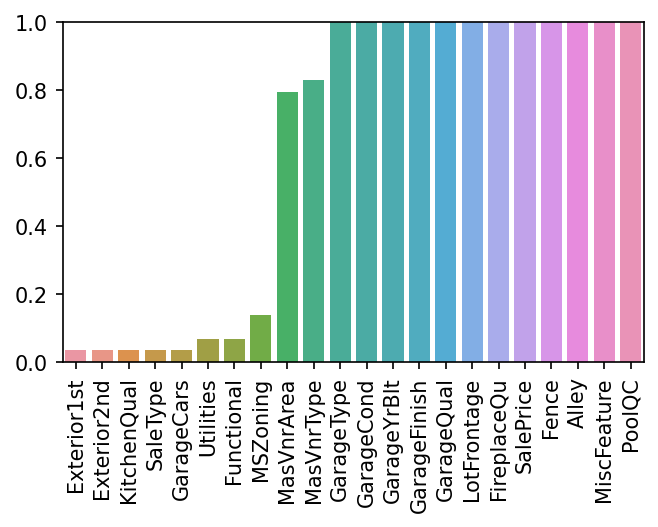

In [67]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [68]:
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [69]:
percent_nan = percent_missing(df)

(0.0, 1.0)

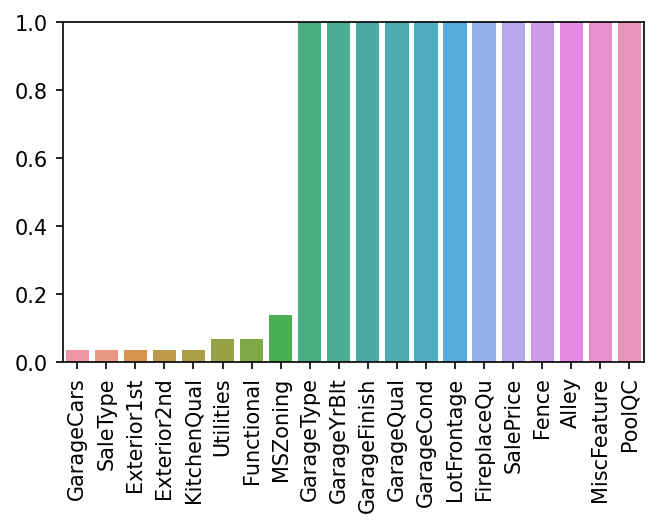

In [70]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [71]:
df[df['SaleType'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2489          20       RL         85.0    13770   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
2489         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
2489       0     10    2007       NaN         Normal        NaN  

[1 rows x 80 columns]

In [72]:
df['SaleType'].value_counts()

WD       2505
New       236
COD        87
ConLD      25
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [73]:
df['SaleType'] = df['SaleType'].fillna('Oth')

In [74]:
df[df['Exterior1st'].isnull()]['Exterior2nd']

2151    NaN
Name: Exterior2nd, dtype: object

In [75]:
df['Exterior1st'] = df['Exterior1st'].fillna('Other')
df['Exterior2nd'] = df['Exterior2nd'].fillna('Other')

In [76]:
percent_nan = percent_missing(df)

(0.0, 1.0)

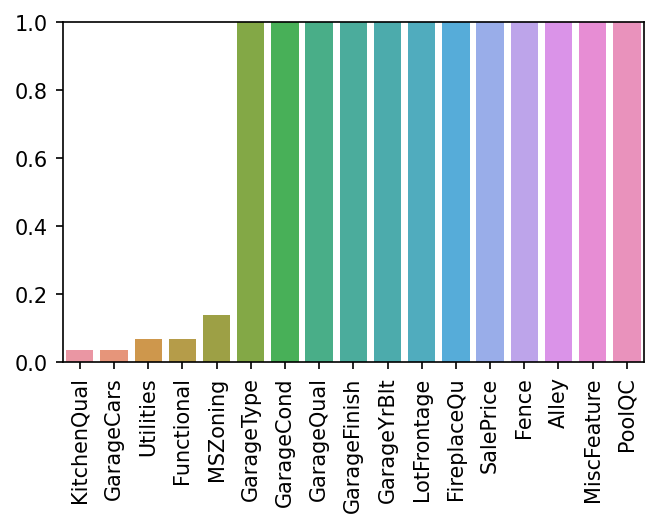

In [77]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

In [78]:
df['KitchenQual'].value_counts()

TA    1485
Gd    1142
Ex     199
Fa      68
Name: KitchenQual, dtype: int64

### Filling KitchenQual by None value

In [79]:
df['KitchenQual'] = df['KitchenQual'].fillna('None')

In [80]:
df['Utilities'].value_counts()

AllPub    2892
NoSeWa       1
Name: Utilities, dtype: int64

### Filling Utilities by modal value

In [81]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0])

In [82]:
df[df['Functional'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2216          20      NaN         80.0    14584   Pave   NaN      Reg   
2473          50       RM         60.0    10320   Pave  Grvl      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
2216         Low    AllPub    Inside  ...        0    NaN   NaN         NaN   
2473         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
2216       0      2    2008        WD        Abnorml        NaN  
2473       0      9    2007       COD        Abnorml        NaN  

[2 rows x 80 columns]

In [83]:
df['Functional'].value_counts()

Typ     2693
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

### Filling Functional by None value

In [84]:
df['Functional'] = df['Functional'].fillna('None')

In [85]:
df[df['MSZoning'].isnull()]

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1915          30      NaN        109.0    21780   Grvl   NaN      Reg   
2216          20      NaN         80.0    14584   Pave   NaN      Reg   
2250          70      NaN          NaN    56600   Pave   NaN      IR1   
2904          20      NaN        125.0    31250   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
1915         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2216         Low    AllPub    Inside  ...        0    NaN   NaN         NaN   
2250         Low    AllPub    Inside  ...        0    NaN   NaN         NaN   
2904         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
1915       0      3    2009     ConLD         Normal        NaN  
2216       0      2    2008        WD        Abnorml        NaN  
2250       0      1    2008        WD         Normal        NaN  
2904       0      5    2006        WD         Normal        NaN  

[4 rows x 80 columns]

In [86]:
df['MSZoning'].value_counts()

RL         2246
RM          459
FV          138
RH           25
C (all)      23
Name: MSZoning, dtype: int64

### Filling Functional by None value

In [87]:
df['MSZoning'] = df['MSZoning'].fillna('None')

(0.0, 1.0)

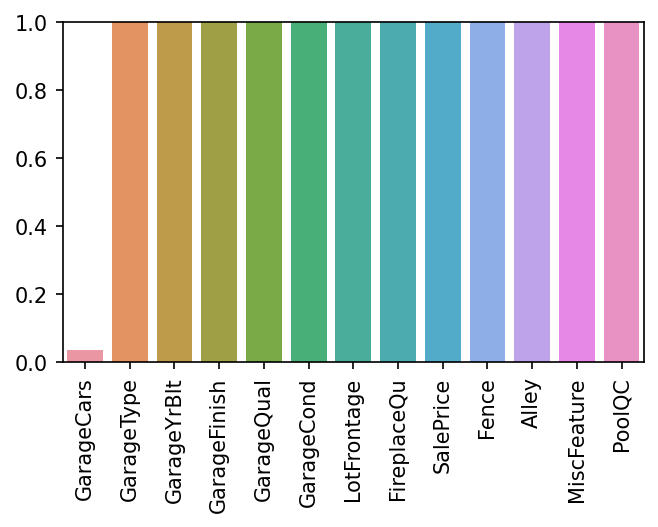

In [88]:
percent_nan = percent_missing(df)

plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

# Устанавливаем пороговое значение 1% 
plt.ylim(0,1)

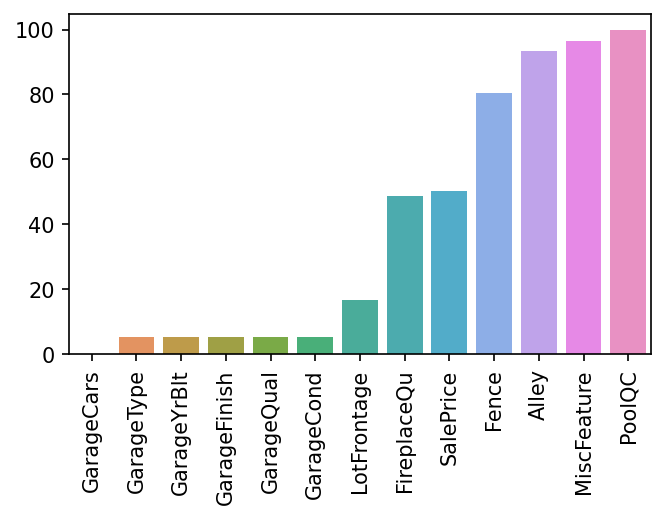

In [89]:
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [90]:
gar_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
df[gar_str_cols] = df[gar_str_cols].fillna('No Garage')

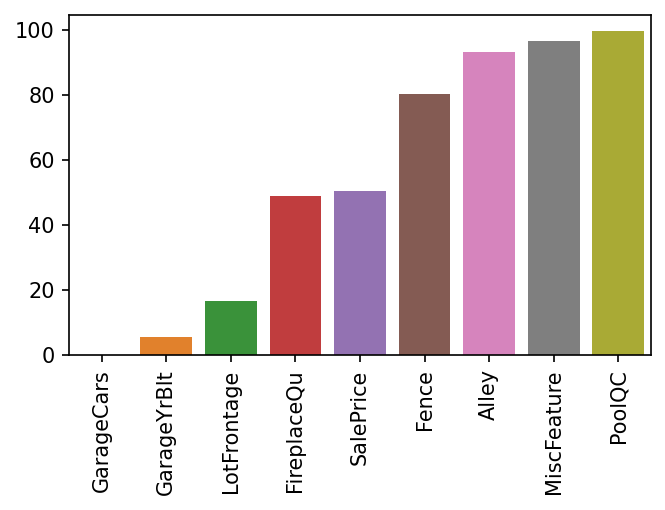

In [91]:
percent_nan = percent_missing(df)
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [92]:
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

### Deleting columns

In [93]:
df = df.drop(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], axis=1)

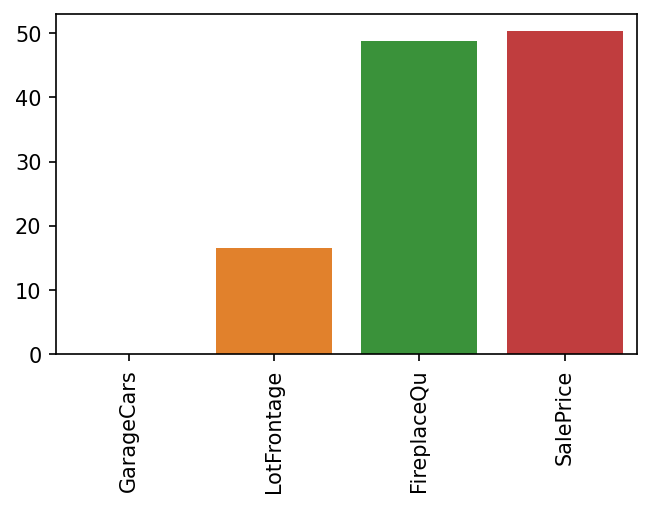

In [94]:
percent_nan = percent_missing(df)
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [95]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

In [96]:
df['LotFrontage'].value_counts()

60.0     274
80.0     137
70.0     133
50.0     117
75.0     105
        ... 
137.0      1
152.0      1
138.0      1
182.0      1
133.0      1
Name: LotFrontage, Length: 126, dtype: int64

In [97]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

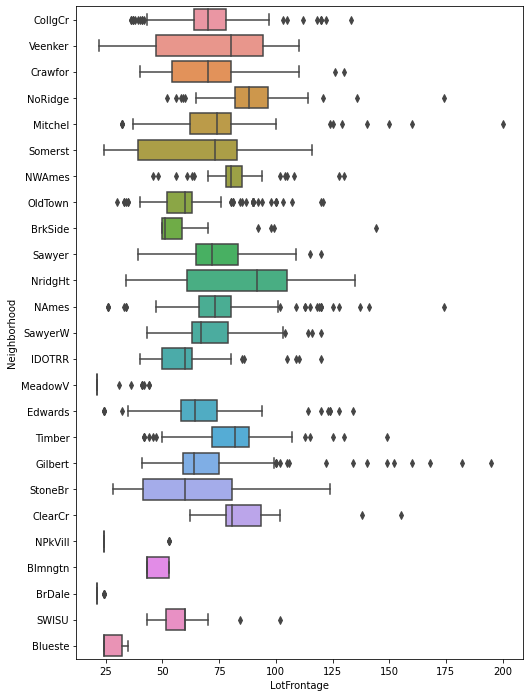

In [98]:
plt.figure(figsize=(8,12))
sns.boxplot(x='LotFrontage',y='Neighborhood',data=df,orient='h');

In [99]:
df.groupby('Neighborhood')['LotFrontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    65.153409
Gilbert    74.207207
IDOTRR     61.588235
MeadowV    25.606061
Mitchel    75.144444
NAmes      74.574866
NPkVill    28.142857
NWAmes     81.517647
NoRidge    89.529412
NridgHt    83.962500
OldTown    61.377193
SWISU      59.046512
Sawyer     74.551020
SawyerW    70.523810
Somerst    64.540373
StoneBr    62.173913
Timber     80.054545
Veenker    72.000000
Name: LotFrontage, dtype: float64

In [100]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda val: val.fillna(val.mean()))

In [101]:
df['LotFrontage'].isnull().sum()

0

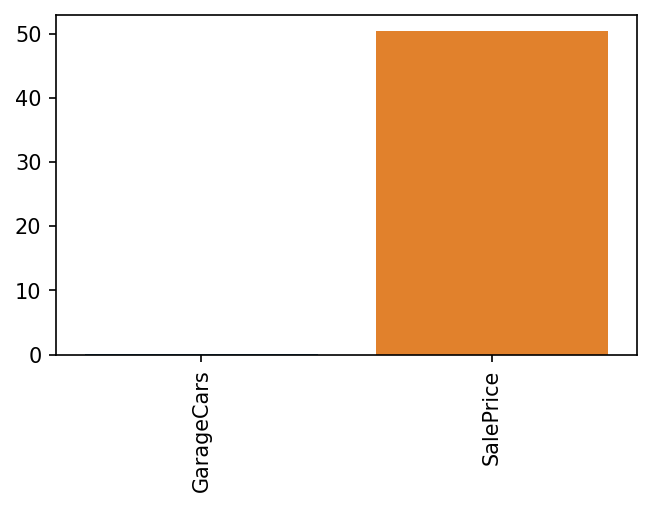

In [102]:
percent_nan = percent_missing(df)
plt.figure(figsize=(5,3), dpi=150)
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=90);

In [107]:
df[df['GarageCars'].isnull()]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

In [106]:
df['GarageCars'] = df['GarageCars'].fillna(0)

## Outliers

In [108]:
df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.802351
GrLivArea        0.716126
GarageCars       0.658720
GarageArea       0.656149
TotalBsmtSF      0.636899
1stFlrSF         0.614323
FullBath         0.552940
YearBuilt        0.541582
TotRmsAbvGrd     0.535605
YearRemodAdd     0.527613
GarageYrBlt      0.492856
MasVnrArea       0.471234
Fireplaces       0.461110
BsmtFinSF1       0.381760
LotArea          0.361913
LotFrontage      0.358672
OpenPorchSF      0.354155
WoodDeckSF       0.325649
2ndFlrSF         0.298910
HalfBath         0.293128
BsmtFullBath     0.223187
BsmtUnfSF        0.221794
BedroomAbvGr     0.155448
ScreenPorch      0.114504
MoSold           0.060178
3SsnPorch        0.050733
PoolArea         0.034785
YrSold          -0.021860
LowQualFinSF    -0.027566
BsmtHalfBath    -0.038583
MiscVal         -0.039382
BsmtFinSF2      -0.041313
OverallCond     -0.080615
MSSubClass      -0.087148
EnclosedPorch   -0.139060
KitchenAbvGr    -0.143716
Name: SalePrice, dtype: float64

In [109]:
features = df.corr()['SalePrice'].sort_values(ascending=False)[1:].index

In [110]:
len(features)

36

In [111]:
target_column = 'SalePrice'

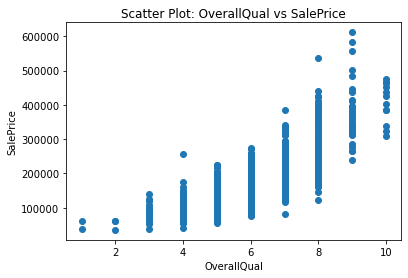

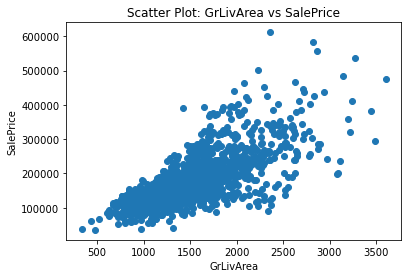

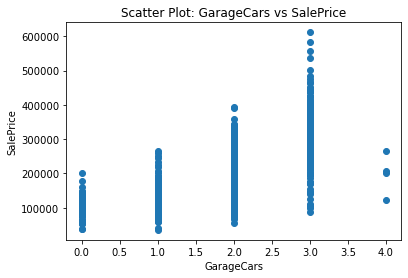

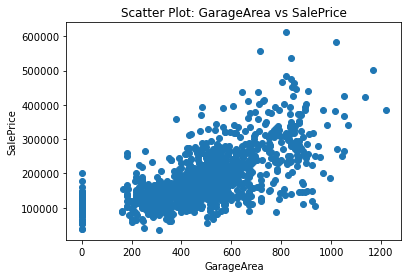

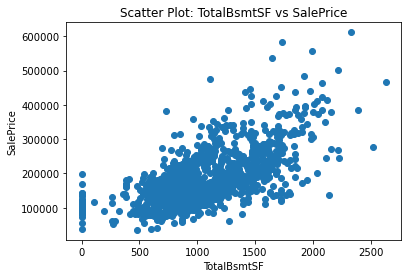

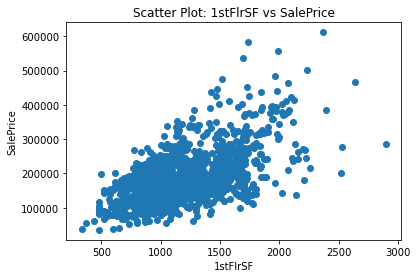

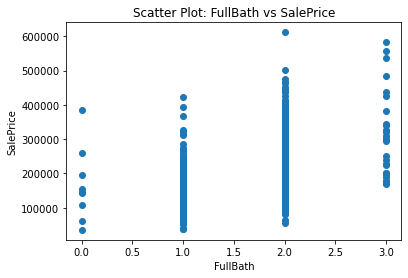

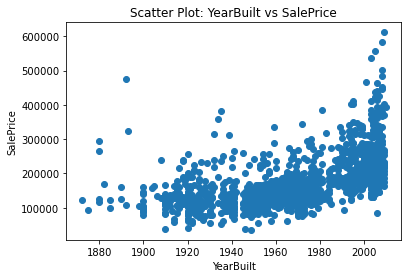

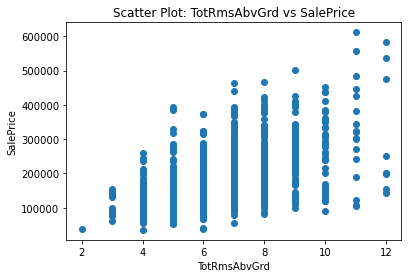

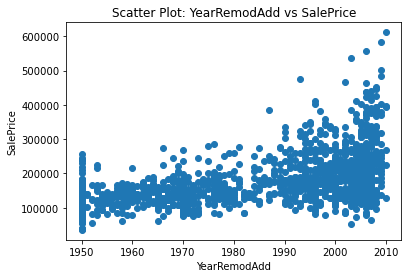

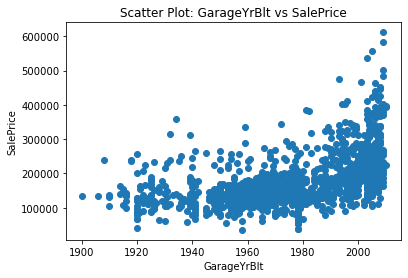

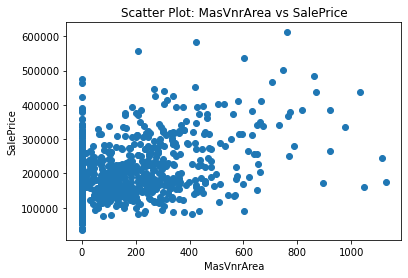

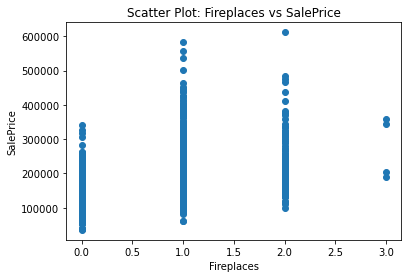

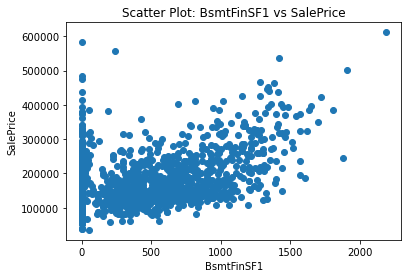

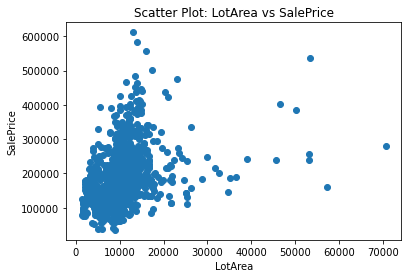

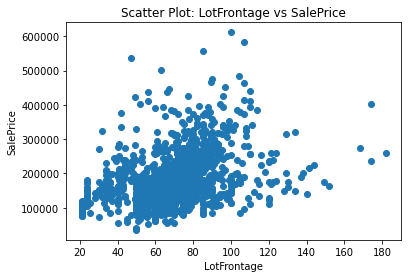

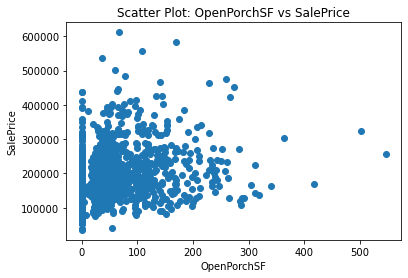

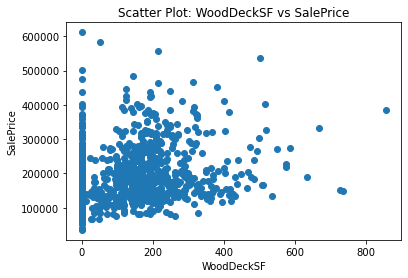

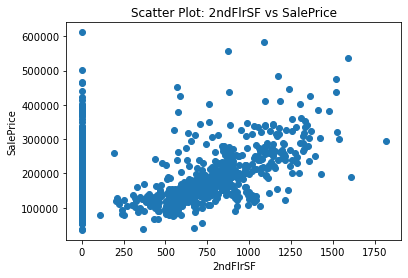

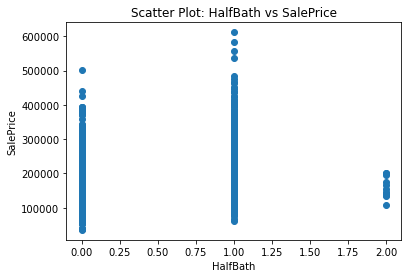

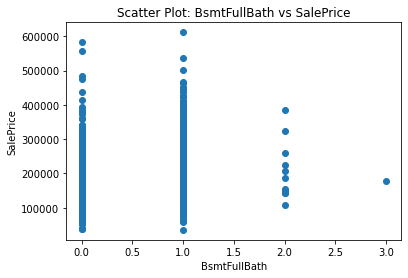

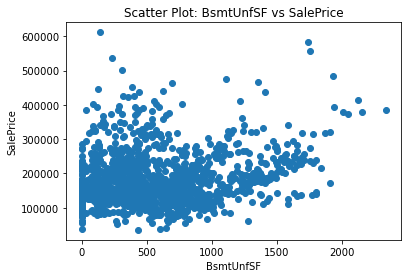

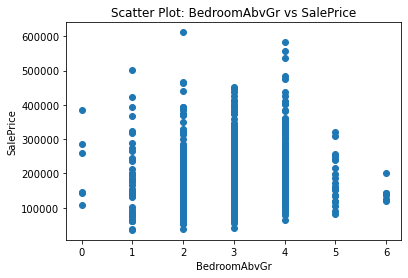

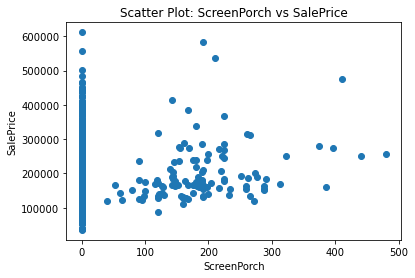

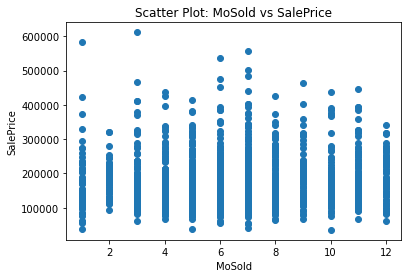

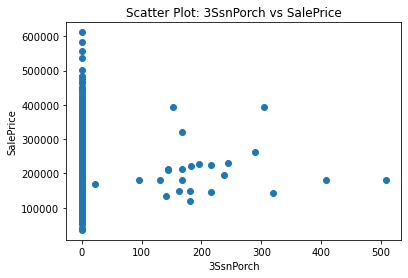

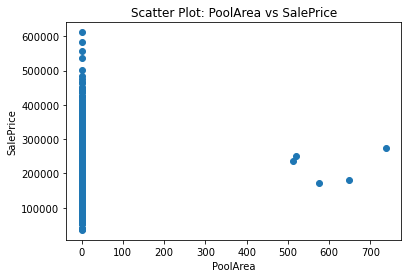

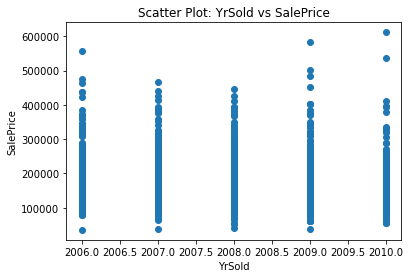

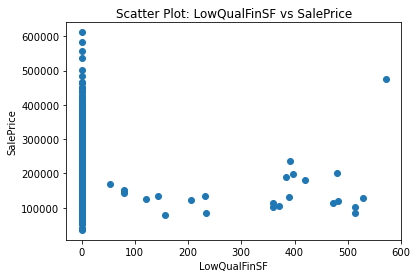

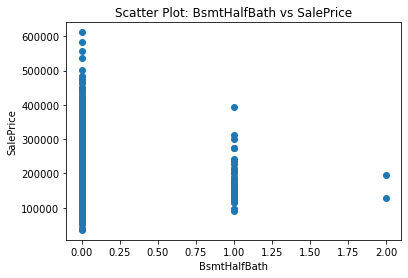

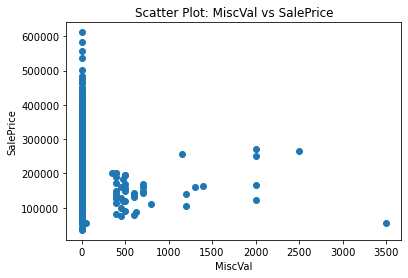

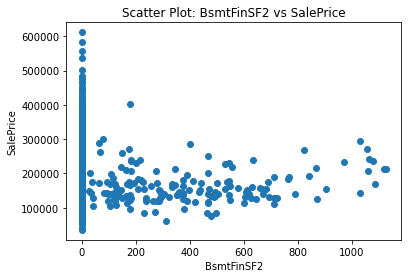

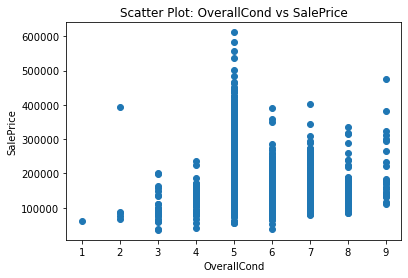

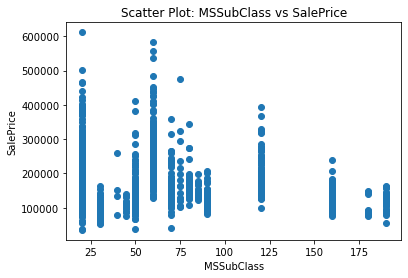

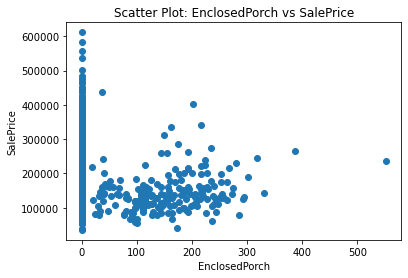

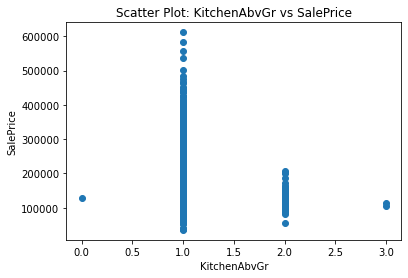

In [112]:
for feature in features:
    plt.scatter(df[feature], df[target_column])
    plt.title(f'Scatter Plot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

### OverallQual

In [113]:
df[(df['OverallQual']>8) & (df['SalePrice'] < 200000)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

### GrLivArea

In [114]:
df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

In [115]:
drop_ind = df[(df['GrLivArea'] > 4000) & (df['SalePrice'] < 200000)].index

In [116]:
df = df.drop(drop_ind, axis=0)

In [117]:
df[(df['GarageCars']==3) & (df['SalePrice'] > 700000)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

In [118]:
df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

In [119]:
drop_ind = df[(df['GarageArea'] > 1200) & (df['SalePrice'] < 300000)].index

In [120]:
df = df.drop(drop_ind, axis=0)

In [121]:
len(df[df['GarageArea'] == 0])

155

In [122]:
one = df[(df['LotFrontage'] > 150) & (df['SalePrice'] < 100000)]

In [123]:
two = df[(df['LotFrontage'] > 300) & (df['SalePrice'] < 300000)]

In [124]:
drop_ind = pd.concat([one,two],axis=0).index

In [125]:
drop_ind

Int64Index([], dtype='int64')

In [126]:
df = df.drop(drop_ind, axis=0)

In [127]:
df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 76 columns]

In [128]:
drop_ind = df[(df['OpenPorchSF'] > 500) & (df['SalePrice'] < 100000)].index

In [129]:
df = df.drop(drop_ind, axis=0)

In [130]:
df[df['PoolArea'] > 500]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
197           75       RL   174.000000    25419   Pave      Reg         Lvl   
810           20       RL    78.000000    10140   Pave      Reg         Lvl   
1170          80       RL    76.000000     9880   Pave      Reg         Lvl   
1386          60       RL    80.000000    16692   Pave      IR1         Lvl   
1423          80       RL    65.153409    19690   Pave      IR1         Lvl   
2599          20       RL   200.000000    43500   Pave      Reg         Lvl   
2710          80       RL   100.000000    14330   Pave      IR1         Low   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
197     AllPub    Corner       Gtl  ...           552         0           0   
810     AllPub    Inside       Gtl  ...             0         0           0   
1170    AllPub    Inside       Gtl  ...             0         0           0   
1386    AllPub    Inside       Gtl  ...             0         0         440   
1423    AllPub   CulDSac       Gtl  ...             0         0           0   
2599    AllPub    Inside       Gtl  ...             0         0           0   
2710    AllPub    Corner       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
197       512       0       3    2006        WD        Abnorml  235000.0  
810       648       0       1    2006        WD         Normal  181000.0  
1170      576       0       7    2008        WD         Normal  171000.0  
1386      519    2000       7    2006        WD         Normal  250000.0  
1423      738       0       8    2006        WD         Alloca  274970.0  
2599      561       0       6    2007        WD         Normal       NaN  
2710      800       0       1    2006        WD         Normal       NaN  

[7 rows x 76 columns]

## Categorial variables

In [131]:
df['MSSubClass'] = df['MSSubClass'].apply(str)

In [132]:
df['MSSubClass'].value_counts()

20     1071
60      568
50      286
120     182
30      136
70      128
160     128
80      117
90      108
190      58
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [133]:
df.select_dtypes(include='object')

MSSubClass MSZoning Street LotShape LandContour Utilities LotConfig  \
0            60       RL   Pave      Reg         Lvl    AllPub    Inside   
1            20       RL   Pave      Reg         Lvl    AllPub       FR2   
2            60       RL   Pave      IR1         Lvl    AllPub    Inside   
3            70       RL   Pave      IR1         Lvl    AllPub    Corner   
4            60       RL   Pave      IR1         Lvl    AllPub       FR2   
...         ...      ...    ...      ...         ...       ...       ...   
2914        160       RM   Pave      Reg         Lvl    AllPub    Inside   
2915        160       RM   Pave      Reg         Lvl    AllPub    Inside   
2916         20       RL   Pave      Reg         Lvl    AllPub    Inside   
2917         85       RL   Pave      Reg         Lvl    AllPub    Inside   
2918         60       RL   Pave      Reg         Lvl    AllPub    Inside   

     LandSlope Neighborhood Condition1  ... KitchenQual Functional  \
0          Gtl      CollgCr       Norm  ...          Gd        Typ   
1          Gtl      Veenker      Feedr  ...          TA        Typ   
2          Gtl      CollgCr       Norm  ...          Gd        Typ   
3          Gtl      Crawfor       Norm  ...          Gd        Typ   
4          Gtl      NoRidge       Norm  ...          Gd        Typ   
...        ...          ...        ...  ...         ...        ...   
2914       Gtl      MeadowV       Norm  ...          TA        Typ   
2915       Gtl      MeadowV       Norm  ...          TA        Typ   
2916       Gtl      Mitchel       Norm  ...          TA        Typ   
2917       Gtl      Mitchel       Norm  ...          TA        Typ   
2918       Mod      Mitchel       Norm  ...          TA        Typ   

     FireplaceQu GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0           None     Attchd          RFn         TA         TA          Y   
1             TA     Attchd          RFn         TA         TA          Y   
2             TA     Attchd          RFn         TA         TA          Y   
3             Gd     Detchd          Unf         TA         TA          Y   
4             TA     Attchd          RFn         TA         TA          Y   
...          ...        ...          ...        ...        ...        ...   
2914        None  No Garage    No Garage  No Garage  No Garage          Y   
2915        None    CarPort          Unf         TA         TA          Y   
2916          TA     Detchd          Unf         TA         TA          Y   
2917        None  No Garage    No Garage  No Garage  No Garage          Y   
2918          TA     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
2914       WD        Normal  
2915       WD       Abnorml  
2916       WD       Abnorml  
2917       WD        Normal  
2918       WD        Normal  

[2895 rows x 40 columns]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2894 entries, 0 to 2918
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2894 non-null   object 
 1   MSZoning       2894 non-null   object 
 2   LotFrontage    2894 non-null   float64
 3   LotArea        2894 non-null   int64  
 4   Street         2894 non-null   object 
 5   LotShape       2894 non-null   object 
 6   LandContour    2894 non-null   object 
 7   Utilities      2894 non-null   object 
 8   LotConfig      2894 non-null   object 
 9   LandSlope      2894 non-null   object 
 10  Neighborhood   2894 non-null   object 
 11  Condition1     2894 non-null   object 
 12  Condition2     2894 non-null   object 
 13  BldgType       2894 non-null   object 
 14  HouseStyle     2894 non-null   object 
 15  OverallQual    2894 non-null   int64  
 16  OverallCond    2894 non-null   int64  
 17  YearBuilt      2894 non-null   int64  
 18  YearRemo

In [113]:
my_object_df = df.select_dtypes(include='object')

In [114]:
my_numeric_df = df.select_dtypes(exclude='object')

In [115]:
df_object_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [116]:
df_object_dummies

MSSubClass_150  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0                  0               0               0               0   
1                  0               0               0               0   
2                  0               0               0               0   
3                  0               0               0               0   
4                  0               0               0               0   
...              ...             ...             ...             ...   
2914               0               1               0               0   
2915               0               1               0               0   
2916               0               0               0               0   
2917               0               0               0               0   
2918               0               0               0               0   

      MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0                 0              0              0              0   
1                 1              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
2914              0              0              0              0   
2915              0              0              0              0   
2916              1              0              0              0   
2917              0              0              0              0   
2918              0              0              0              0   

      MSSubClass_50  MSSubClass_60  ...  SaleType_ConLI  SaleType_ConLw  \
0                 0              1  ...               0               0   
1                 0              0  ...               0               0   
2                 0              1  ...               0               0   
3                 0              0  ...               0               0   
4                 0              1  ...               0               0   
...             ...            ...  ...             ...             ...   
2914              0              0  ...               0               0   
2915              0              0  ...               0               0   
2916              0              0  ...               0               0   
2917              0              0  ...               0               0   
2918              0              1  ...               0               0   

      SaleType_New  SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  \
0                0             0            1                      0   
1                0             0            1                      0   
2                0             0            1                      0   
3                0             0            1                      0   
4                0             0            1                      0   
...            ...           ...          ...                    ...   
2914             0             0            1                      0   
2915             0             0            1                      0   
2916             0             0            1                      0   
2917             0             0            1                      0   
2918             0             0            1                      0   

      SaleCondition_Alloca  SaleCondition_Family  SaleCondition_Normal  \
0                        0                     0                     1   
1                        0                     0                     1   
2                        0                     0                     1   
3                        0                     0                     0   
4                        0                     0                     1   
...                    ...                   ...                   ...   
2914                     0              

In [134]:
df.corr()['SalePrice'].sort_values(ascending=False)[1:]

OverallQual      0.802351
GrLivArea        0.716126
GarageCars       0.658720
GarageArea       0.656149
TotalBsmtSF      0.636899
1stFlrSF         0.614323
FullBath         0.552940
YearBuilt        0.541582
TotRmsAbvGrd     0.535605
YearRemodAdd     0.527613
GarageYrBlt      0.492856
MasVnrArea       0.471234
Fireplaces       0.461110
BsmtFinSF1       0.381760
LotArea          0.361913
LotFrontage      0.358672
OpenPorchSF      0.354155
WoodDeckSF       0.325649
2ndFlrSF         0.298910
HalfBath         0.293128
BsmtFullBath     0.223187
BsmtUnfSF        0.221794
BedroomAbvGr     0.155448
ScreenPorch      0.114504
MoSold           0.060178
3SsnPorch        0.050733
PoolArea         0.034785
YrSold          -0.021860
LowQualFinSF    -0.027566
BsmtHalfBath    -0.038583
MiscVal         -0.039382
BsmtFinSF2      -0.041313
OverallCond     -0.080615
EnclosedPorch   -0.139060
KitchenAbvGr    -0.143716
Name: SalePrice, dtype: float64

In [135]:
df.isnull().sum().sort_values()

MSSubClass         0
Fireplaces         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
                ... 
Exterior2nd        0
Exterior1st        0
RoofMatl           0
Foundation         0
SalePrice       1459
Length: 76, dtype: int64

In [136]:
df.to_csv('cleaned_df.csv', index=False)

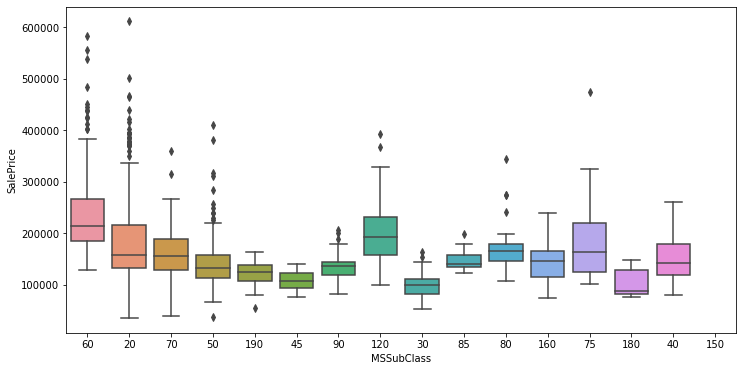

In [137]:
plt.figure(figsize=(12,6))
sns.boxplot(x='MSSubClass',y='SalePrice',data=df);

In [126]:
features = df.select_dtypes(include='object').columns

In [127]:
target_column = 'SalePrice'

C:\Users\79852\AppData\Local\Temp\ipykernel_18500\1016194521.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,3), dpi=150)


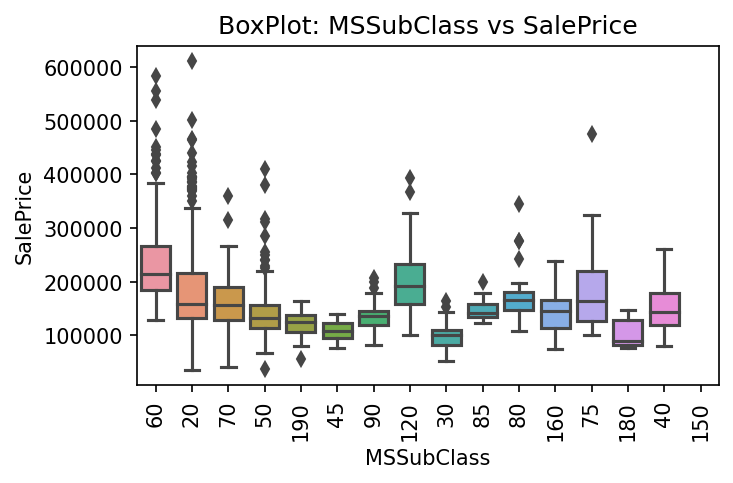

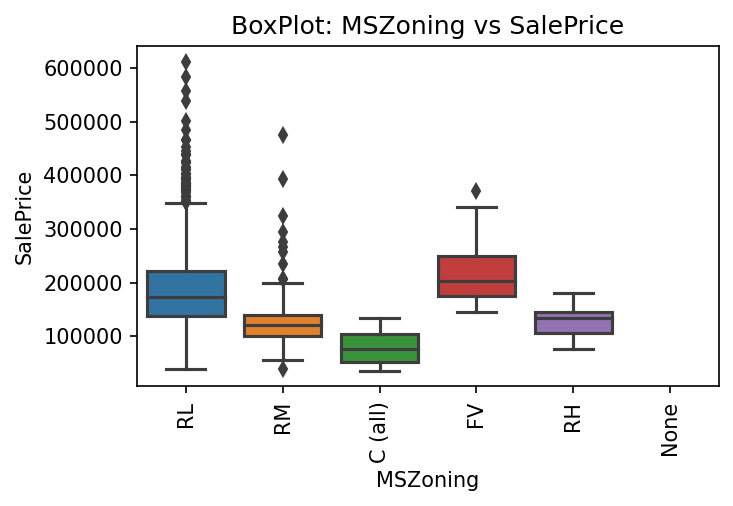

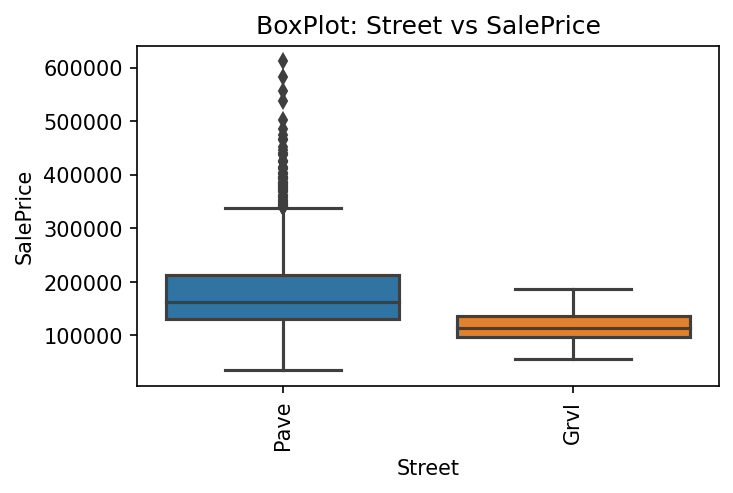

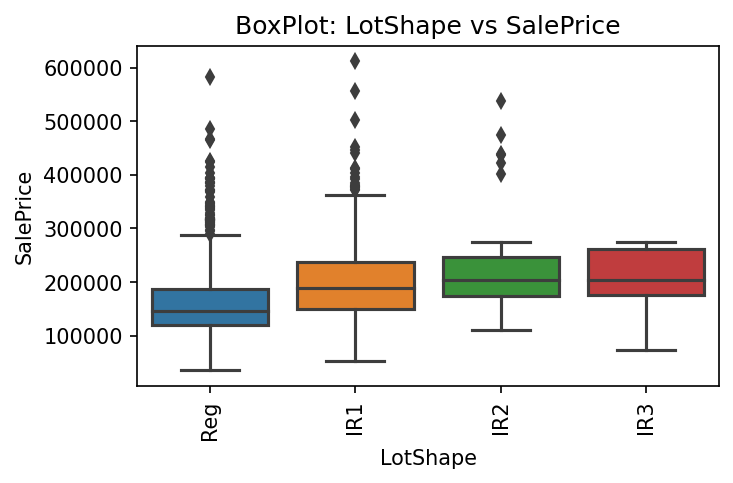

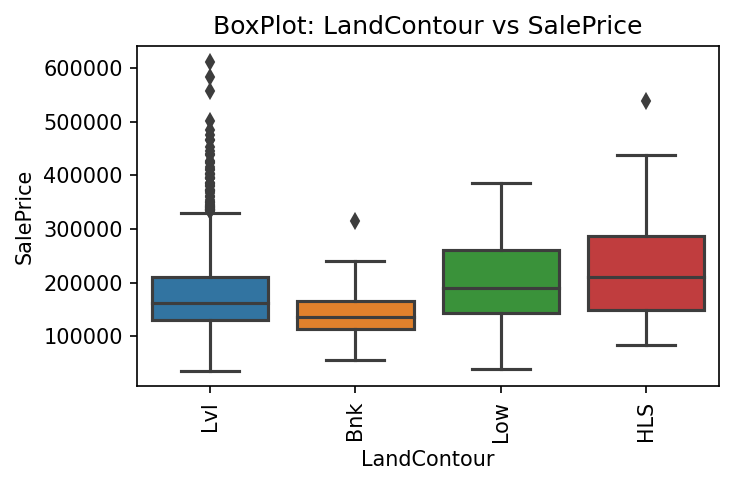

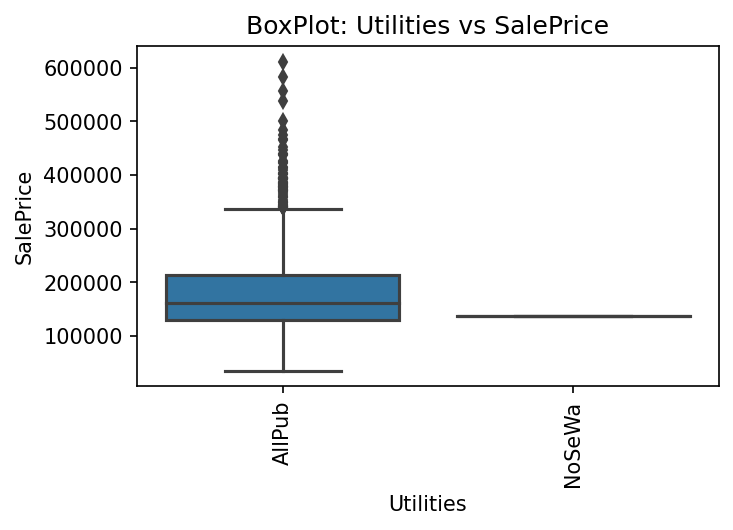

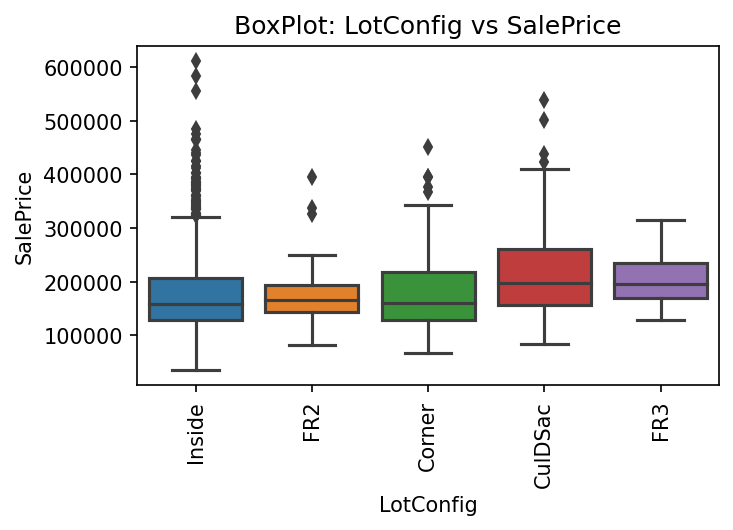

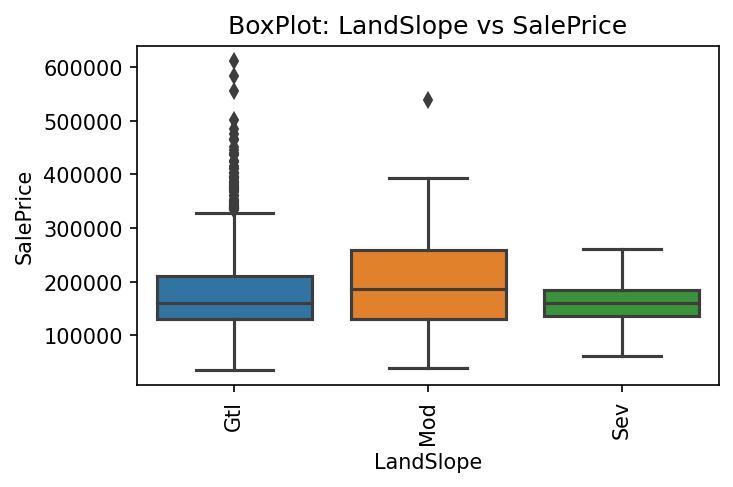

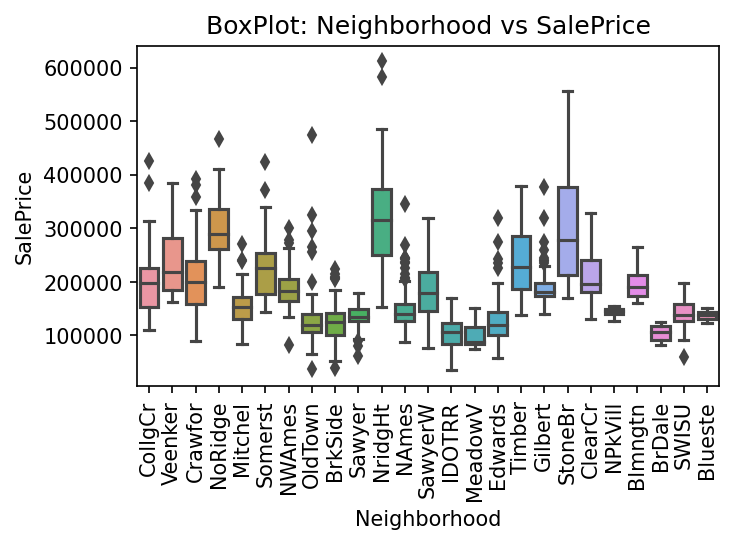

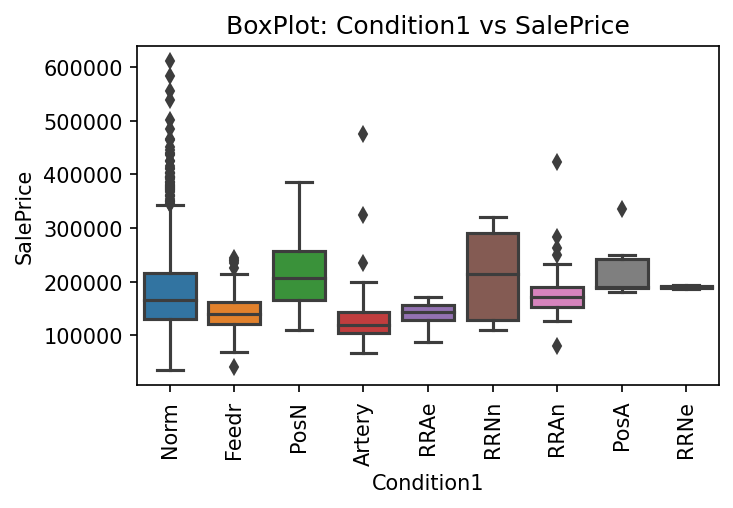

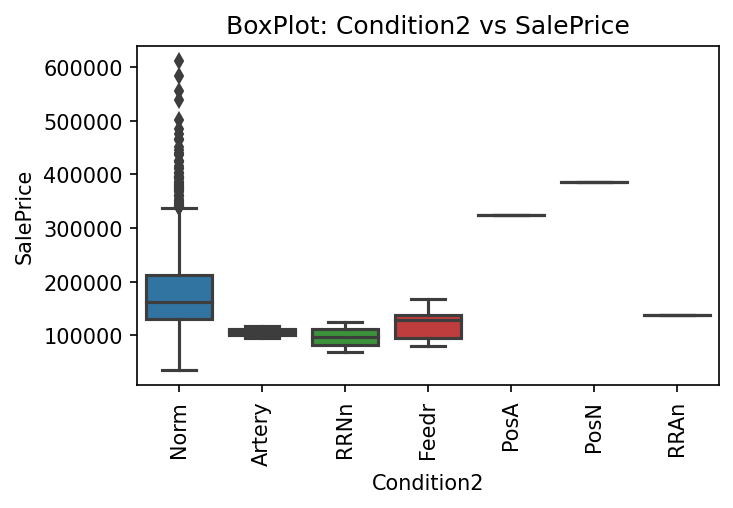

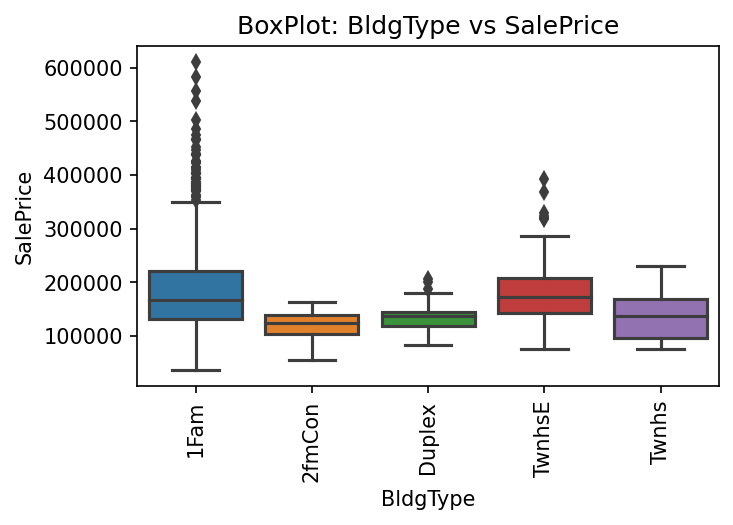

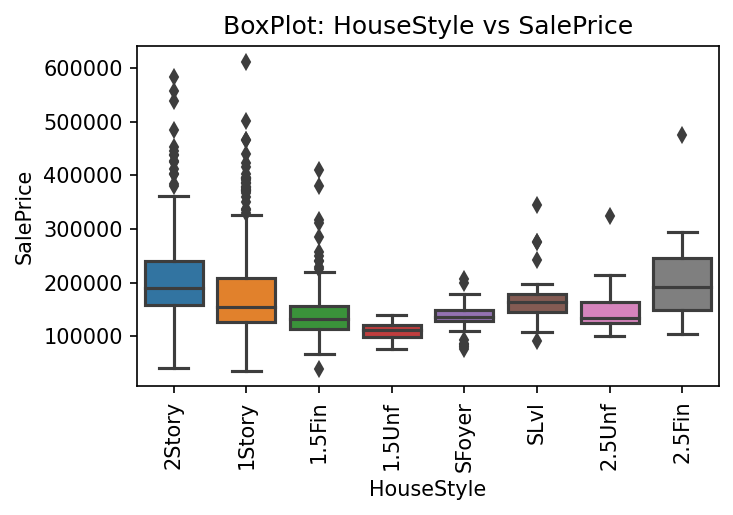

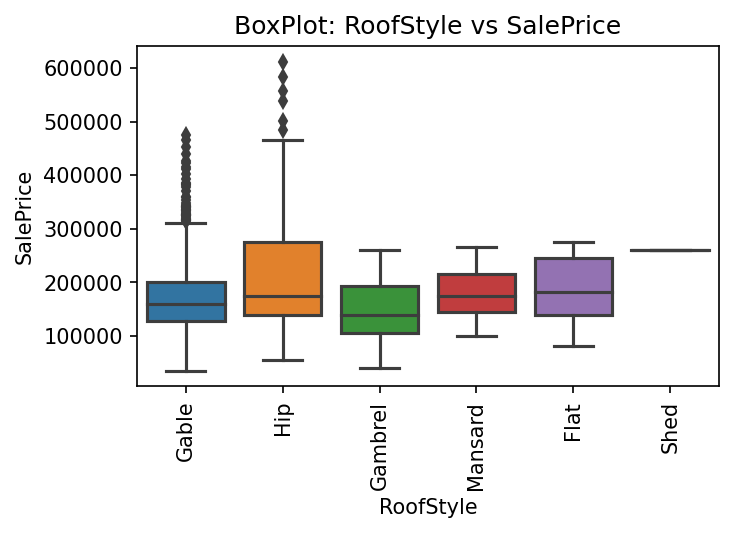

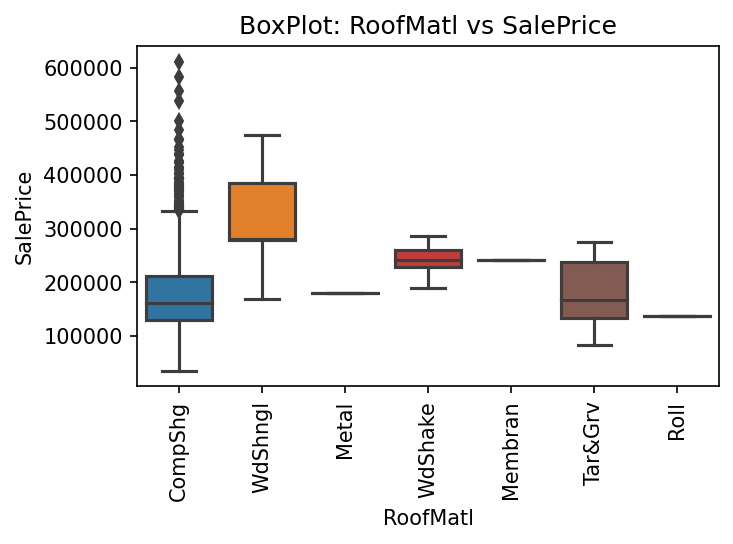

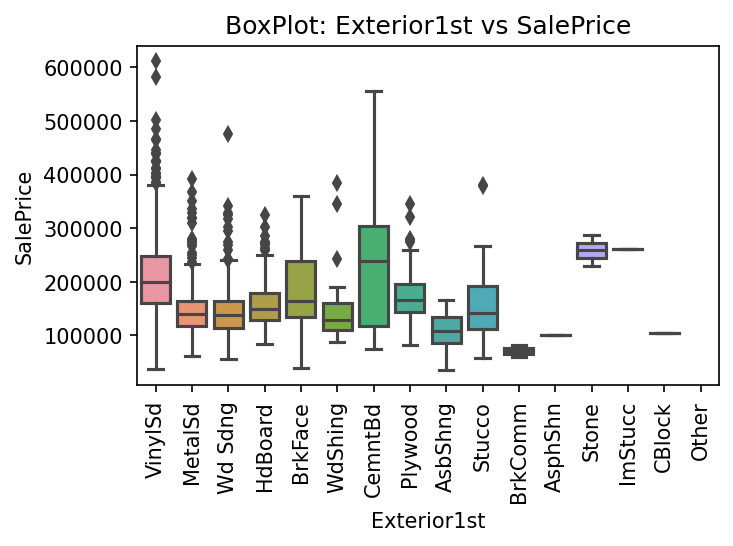

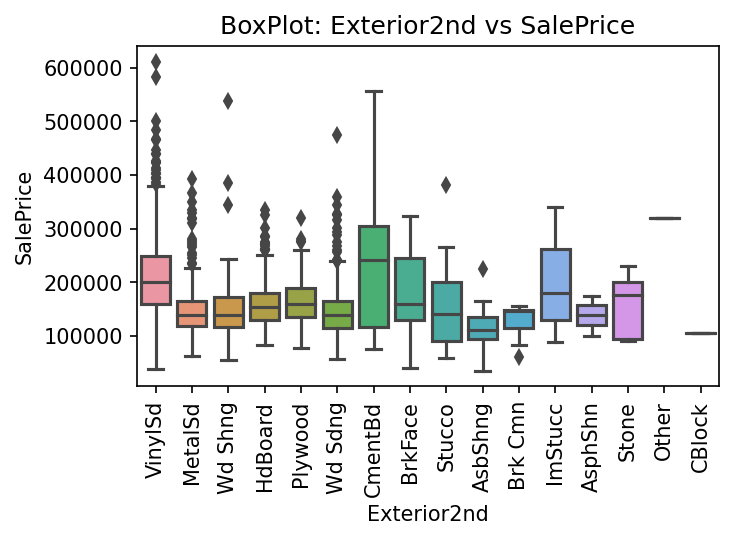

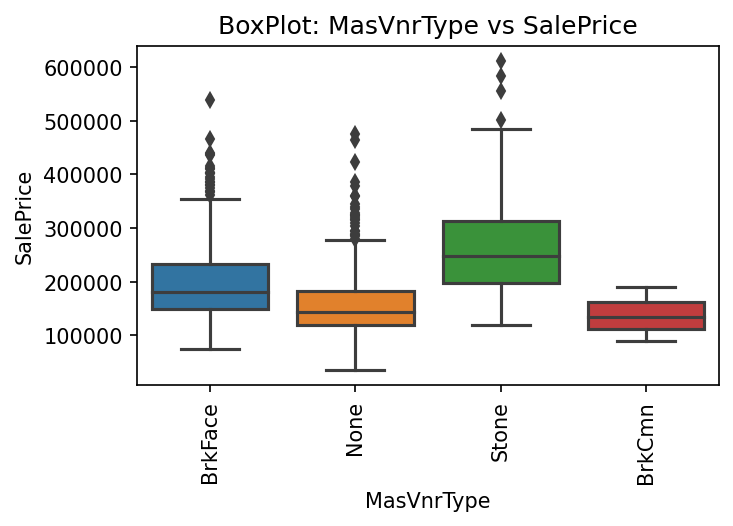

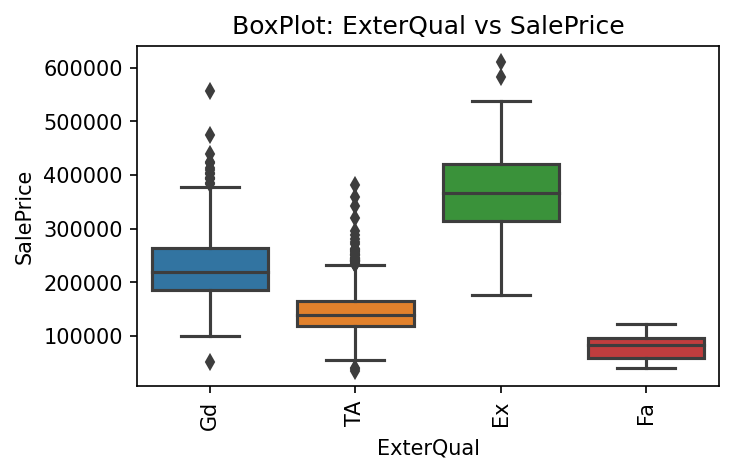

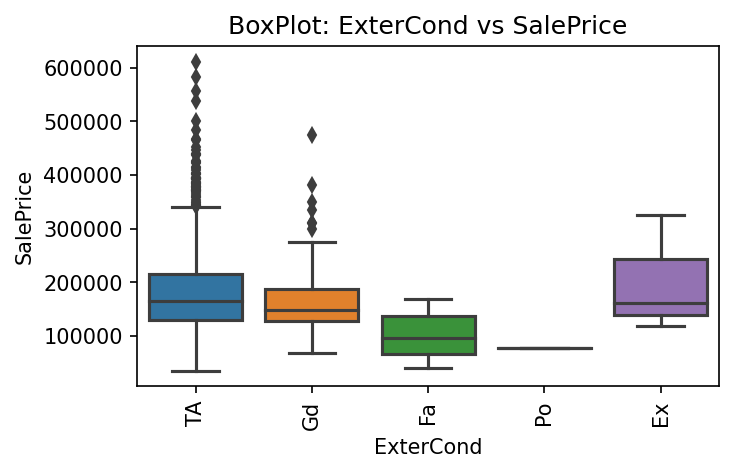

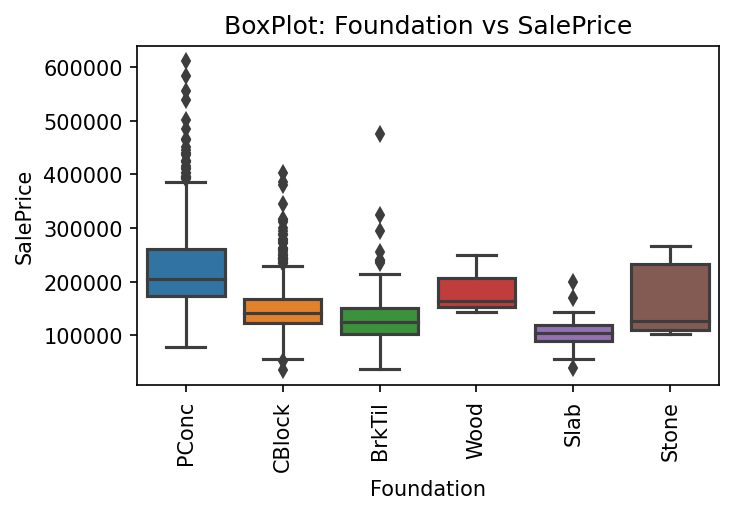

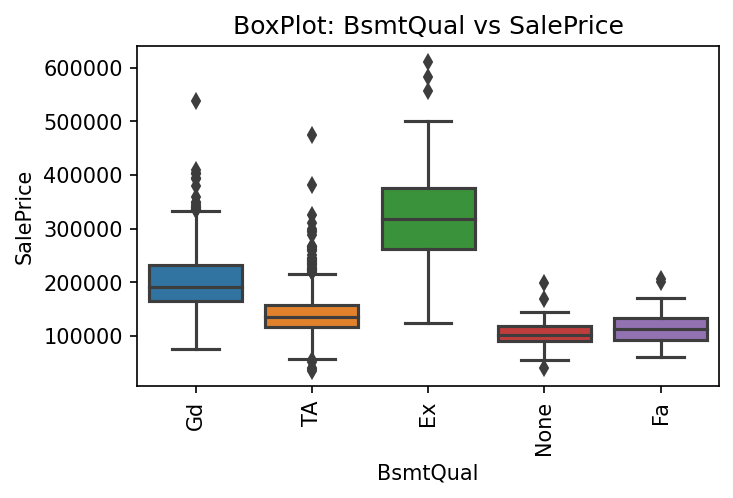

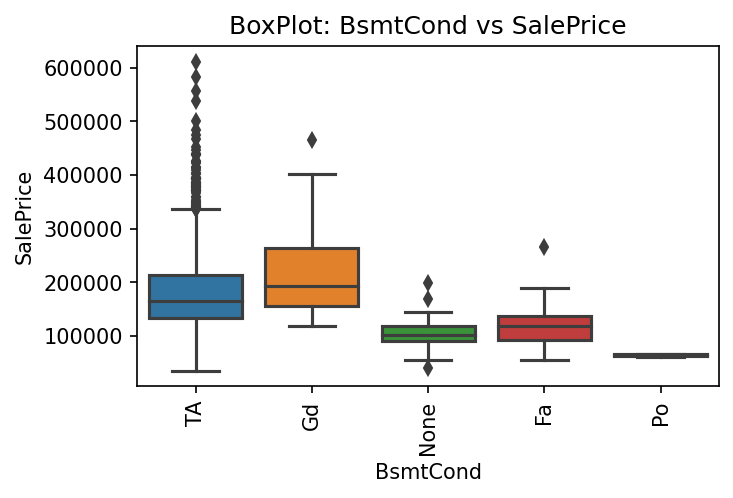

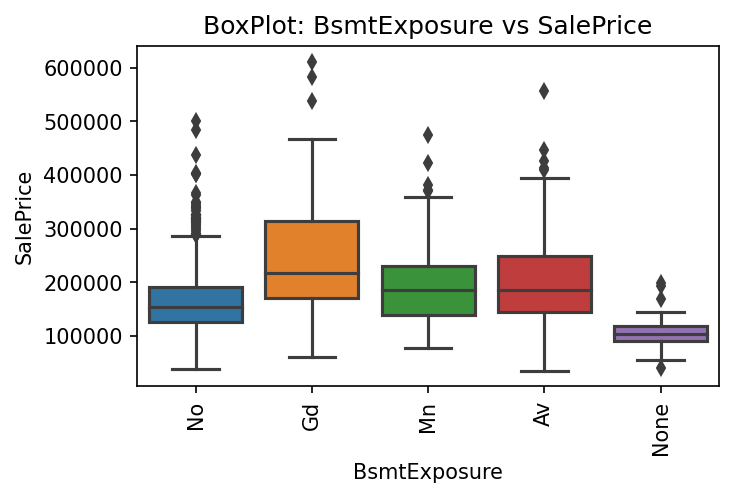

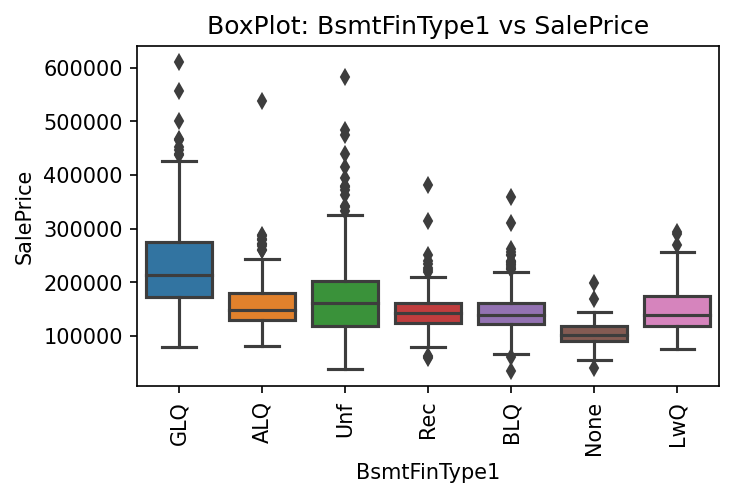

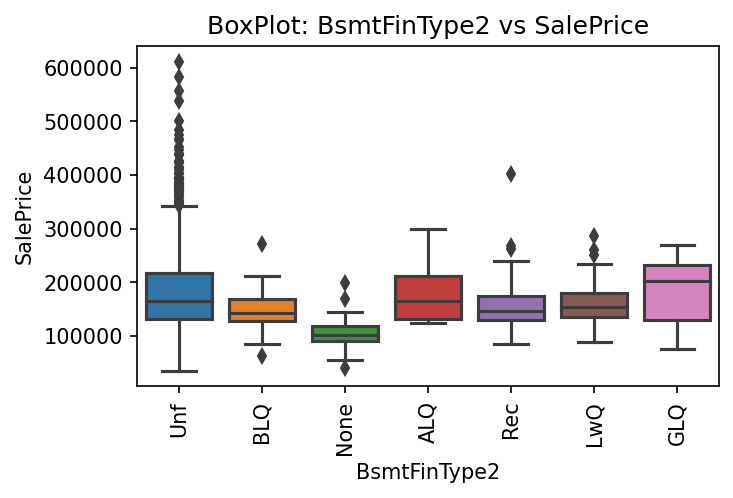

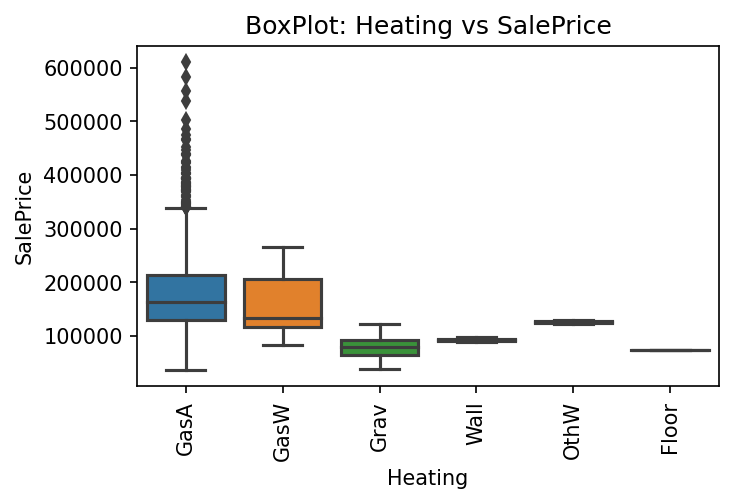

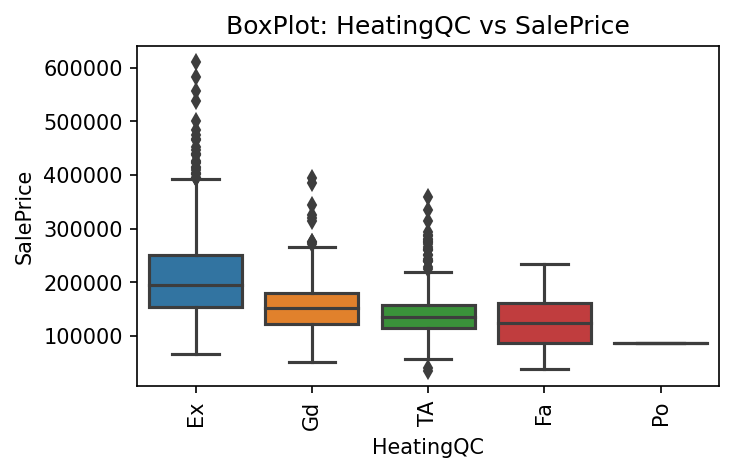

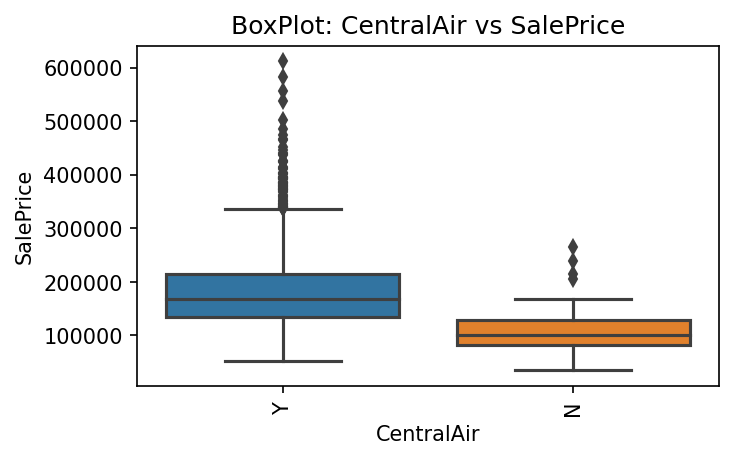

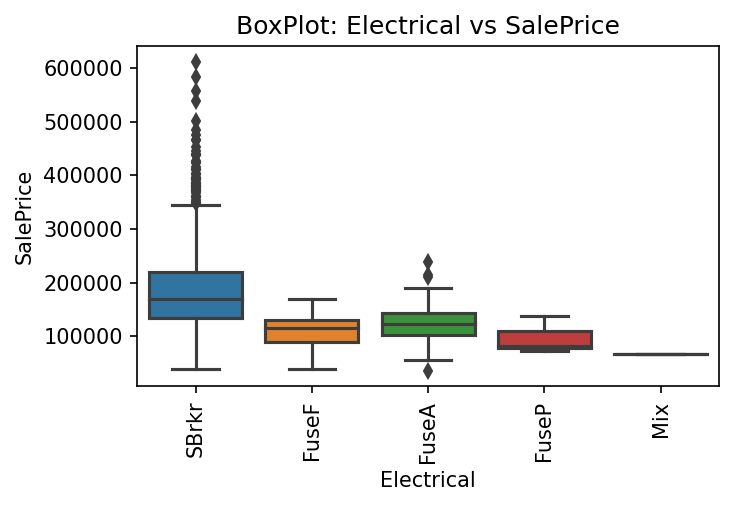

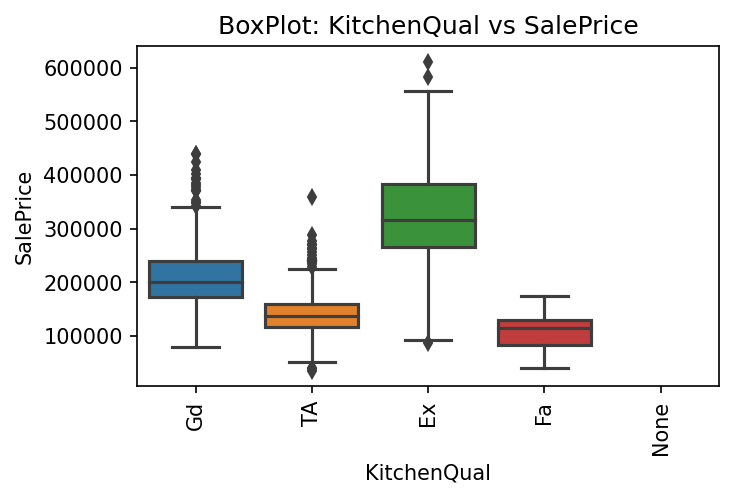

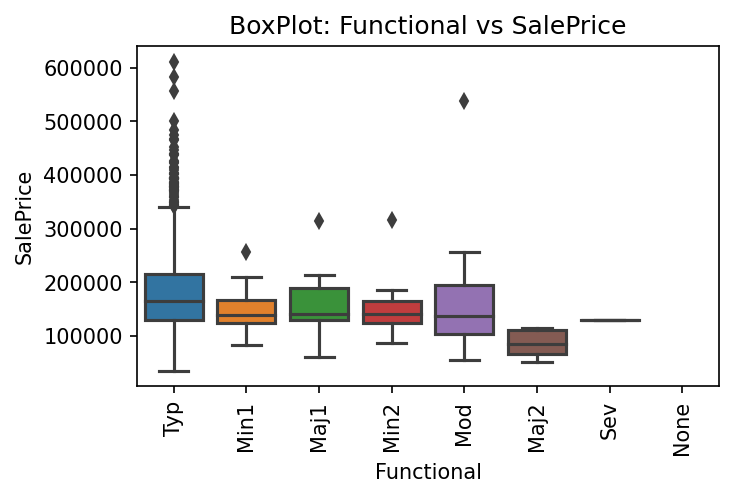

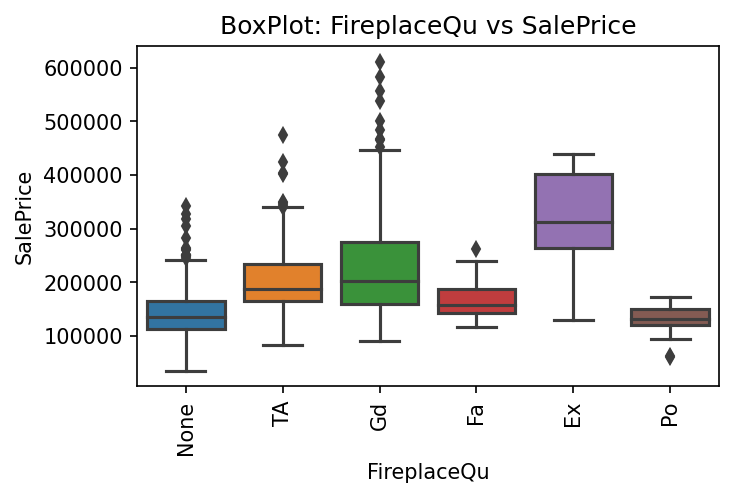

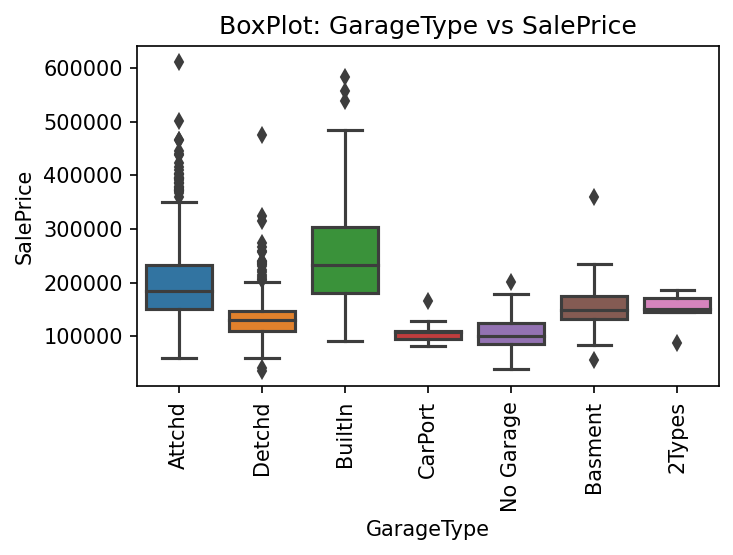

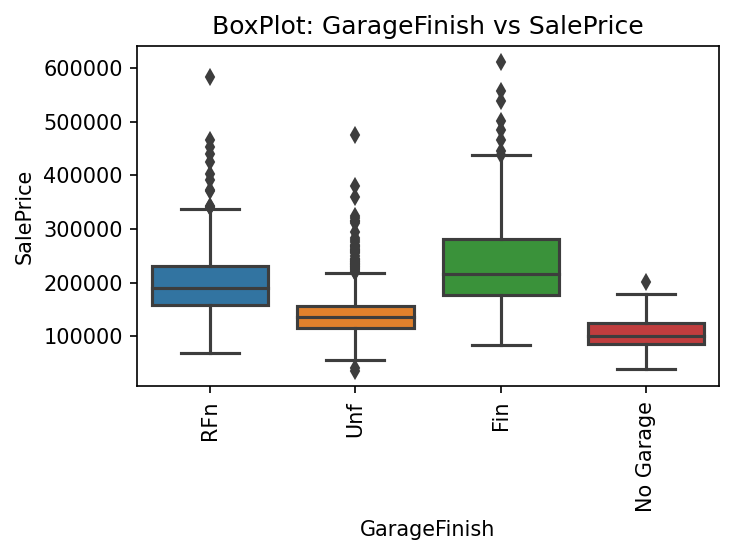

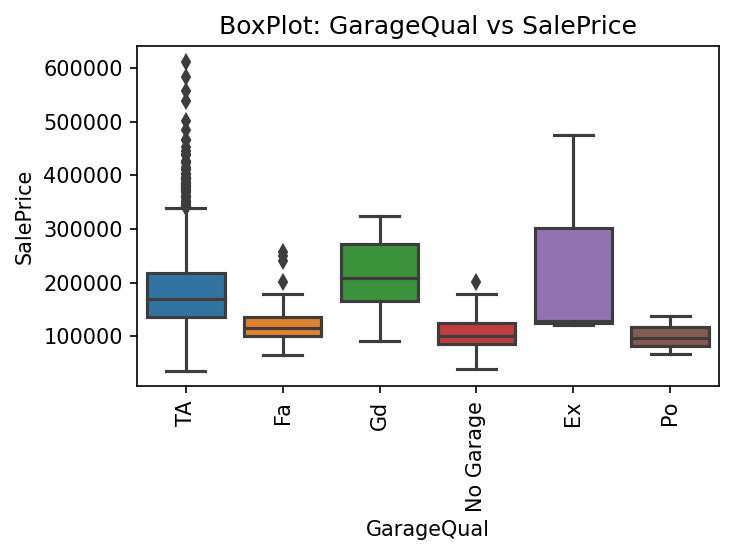

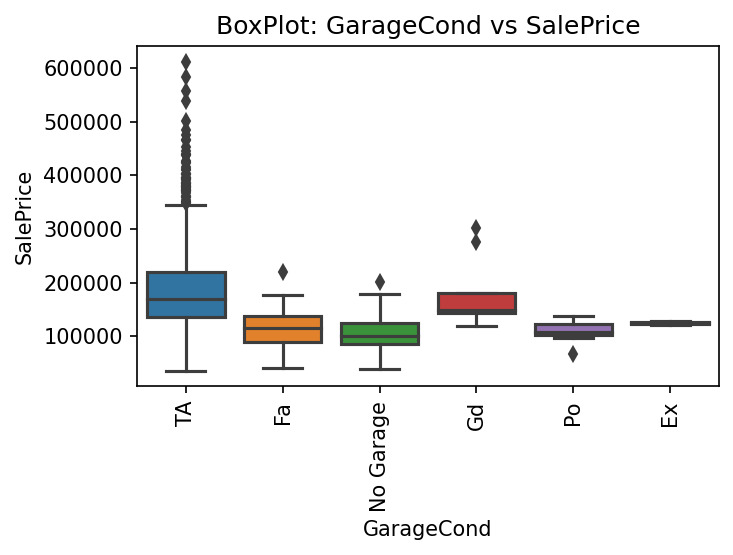

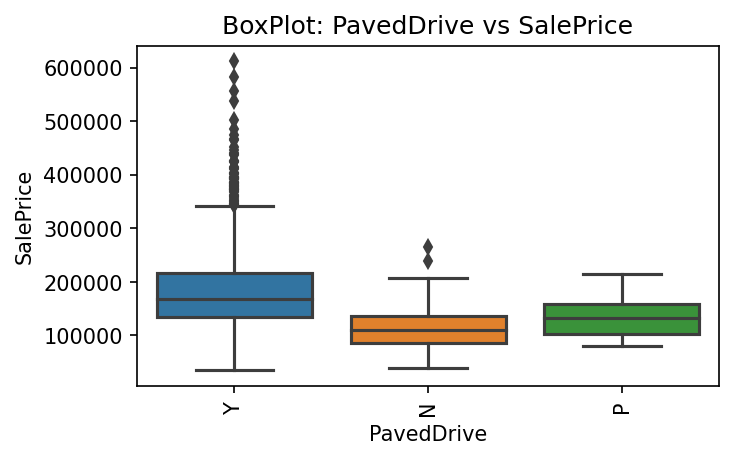

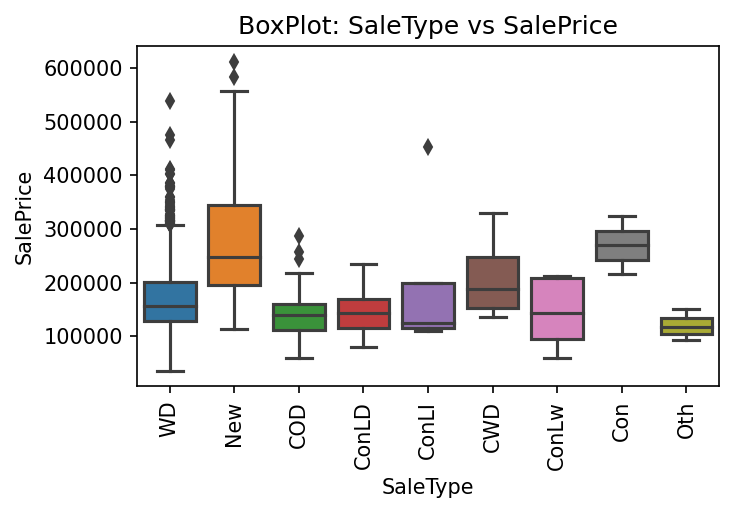

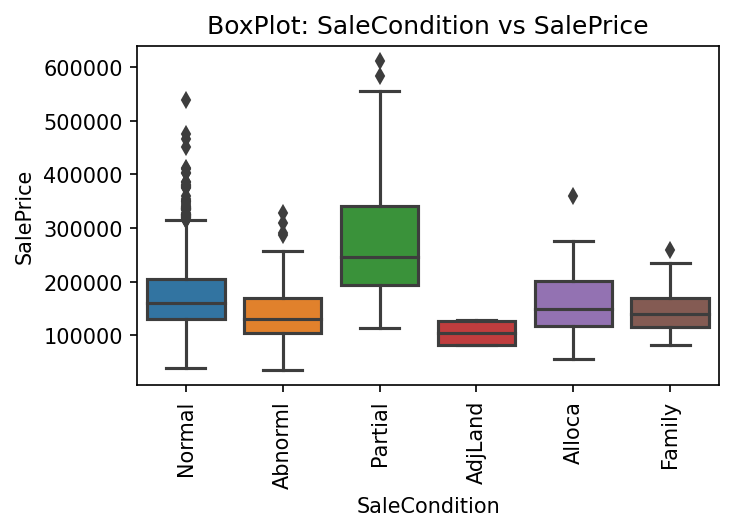

In [128]:
for feature in features:
    plt.figure(figsize=(5,3), dpi=150)
    sns.boxplot(x=feature,y=target_column,data=df)
    plt.title(f'BoxPlot: {feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.xticks(rotation=90);

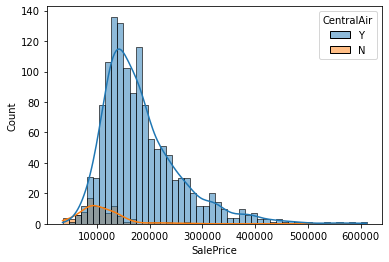

In [129]:
sns.histplot(data=df, x='SalePrice', bins=50, kde=True, hue='CentralAir');

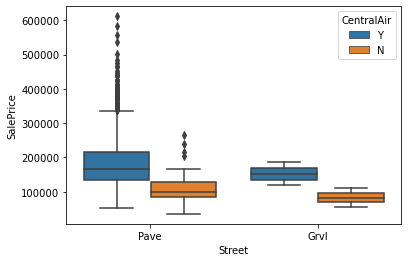

In [130]:
sns.boxplot(data=df,y='SalePrice', x='Street', hue='CentralAir');

In [131]:
df['SalePrice'].describe()

count      1436.000000
mean     179068.630223
std       74688.157021
min       35311.000000
25%      129900.000000
50%      162000.000000
75%      213000.000000
max      611657.000000
Name: SalePrice, dtype: float64

In [132]:
df['SalePrice'].quantile([0.25, 0.75])

0.25    129900.0
0.75    213000.0
Name: SalePrice, dtype: float64

In [133]:
fe = df.select_dtypes('object').nunique() == 2

In [134]:
fe[fe==True]

Street        True
Utilities     True
CentralAir    True
dtype: bool

In [135]:
len(df)

2894

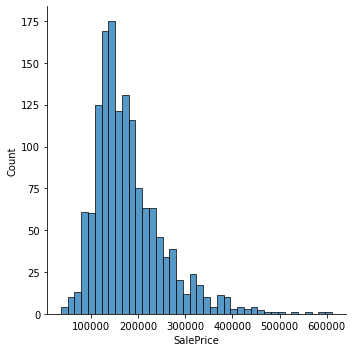

In [136]:
sns.displot(data=df, x='SalePrice');

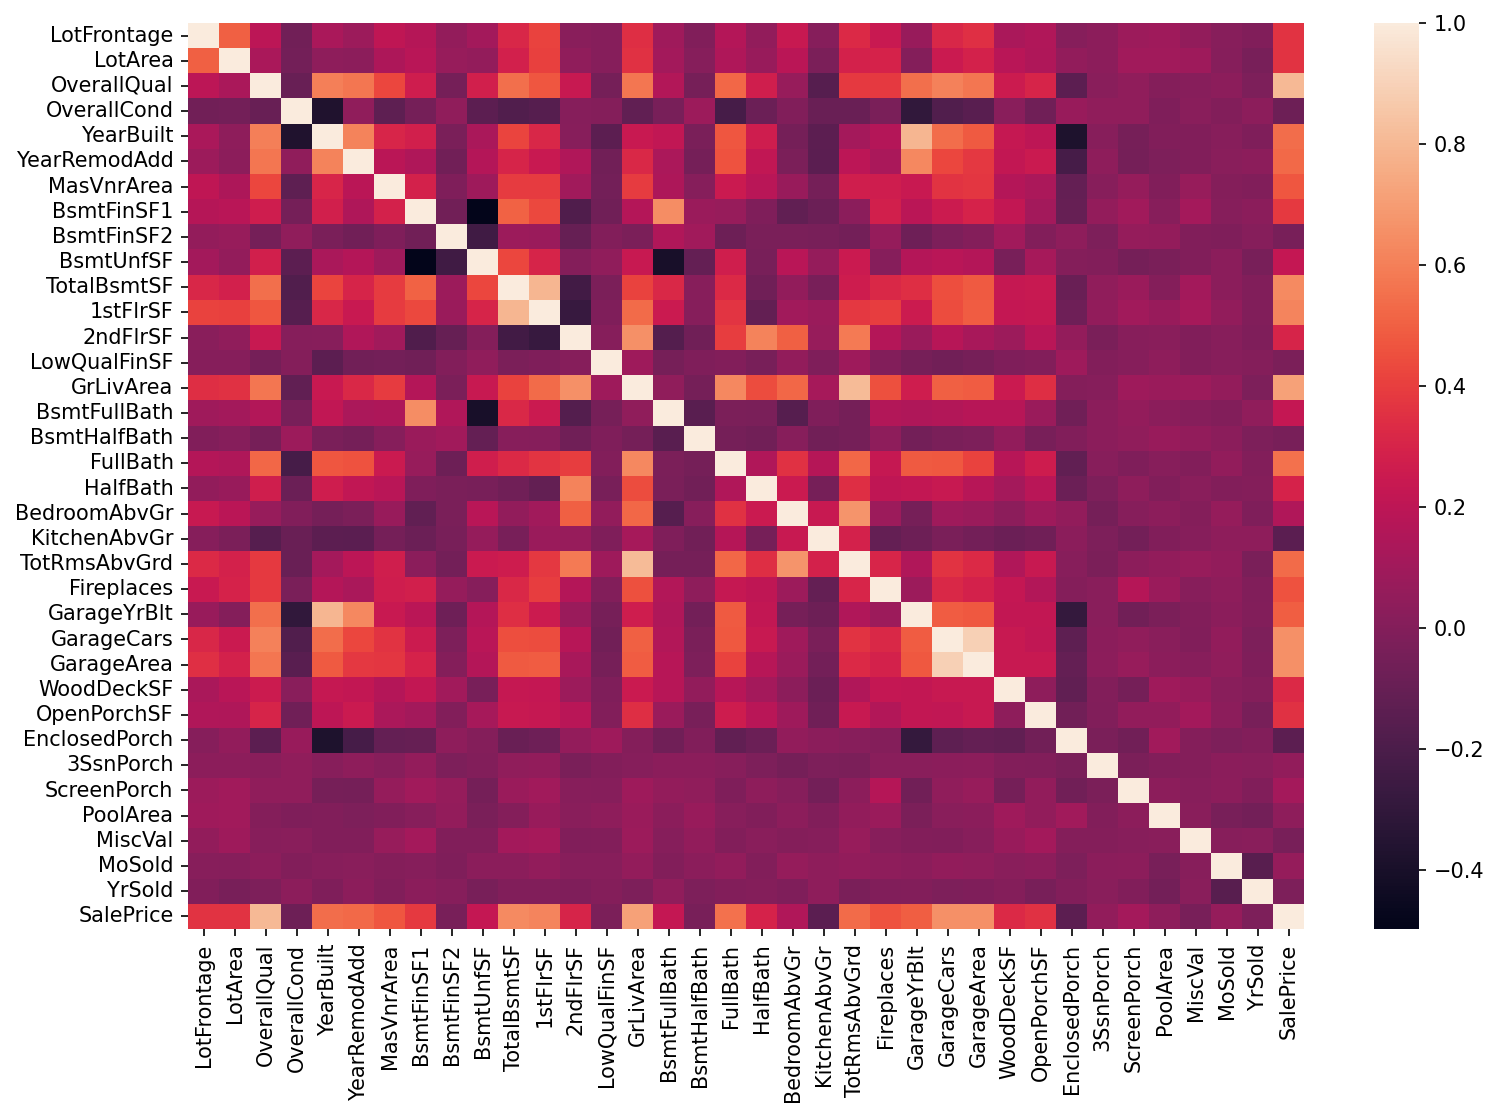

In [140]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df.corr());

In [144]:
df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.143716
EnclosedPorch   -0.139060
OverallCond     -0.080615
BsmtFinSF2      -0.041313
MiscVal         -0.039382
BsmtHalfBath    -0.038583
LowQualFinSF    -0.027566
YrSold          -0.021860
PoolArea         0.034785
3SsnPorch        0.050733
MoSold           0.060178
ScreenPorch      0.114504
BedroomAbvGr     0.155448
BsmtUnfSF        0.221794
BsmtFullBath     0.223187
HalfBath         0.293128
2ndFlrSF         0.298910
WoodDeckSF       0.325649
OpenPorchSF      0.354155
LotFrontage      0.358672
LotArea          0.361913
BsmtFinSF1       0.381760
Fireplaces       0.461110
MasVnrArea       0.471234
GarageYrBlt      0.492856
YearRemodAdd     0.527613
TotRmsAbvGrd     0.535605
YearBuilt        0.541582
FullBath         0.552940
1stFlrSF         0.614323
TotalBsmtSF      0.636899
GarageArea       0.656149
GarageCars       0.658720
GrLivArea        0.716126
OverallQual      0.802351
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [145]:
df_2 = df.drop(['GarageYrBlt', 'TotRmsAbvGrd'], axis=1)

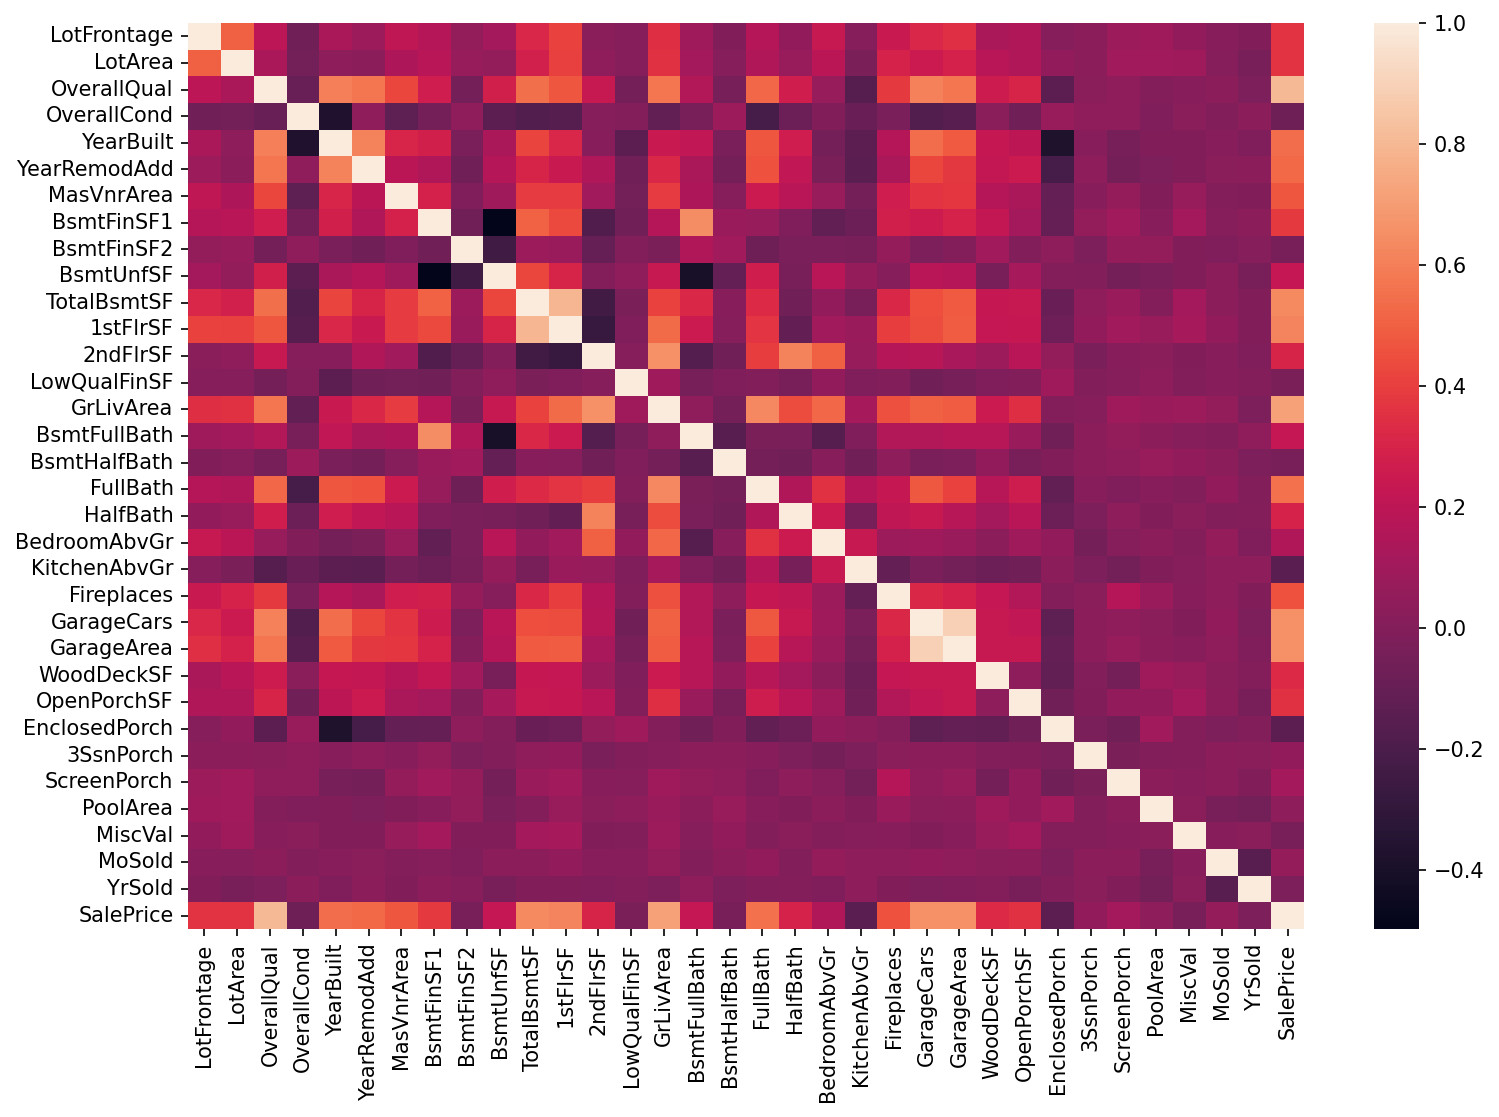

In [146]:
plt.figure(figsize=(12,8), dpi=150)
sns.heatmap(df_2.corr());

In [151]:
df_2.to_csv('cleaned_df_2.csv', index=False)

In [152]:
df_num = df_2.select_dtypes(include = ['float64', 'int64'])

In [153]:
df_num

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0            65.0     8450            7            5       2003          2003   
1            80.0     9600            6            8       1976          1976   
2            68.0    11250            7            5       2001          2002   
3            60.0     9550            7            5       1915          1970   
4            84.0    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
2914         21.0     1936            4            7       1970          1970   
2915         21.0     1894            4            5       1970          1970   
2916        160.0    20000            5            7       1960          1996   
2917         62.0    10441            5            5       1992          1992   
2918         74.0     9627            7            5       1993          1994   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  WoodDeckSF  \
0          196.0       706.0         0.0      150.0  ...           0   
1            0.0       978.0         0.0      284.0  ...         298   
2          162.0       486.0         0.0      434.0  ...           0   
3            0.0       216.0         0.0      540.0  ...           0   
4          350.0       655.0         0.0      490.0  ...         192   
...          ...         ...         ...        ...  ...         ...   
2914         0.0         0.0         0.0      546.0  ...           0   
2915         0.0       252.0         0.0      294.0  ...           0   
2916         0.0      1224.0         0.0        0.0  ...         474   
2917         0.0       337.0         0.0      575.0  ...          80   
2918        94.0       758.0         0.0      238.0  ...         190   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
2914            0              0          0            0         0        0   
2915           24              0          0            0         0        0   
2916            0              0          0            0         0        0   
2917           32              0          0            0         0      700   
2918           48              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008   208500.0  
1          5    2007   181500.0  
2          9    2008   223500.0  
3          2    2006   140000.0  
4         12    2008   250000.0  
...      ...     ...        ...  
2914       6    2006        NaN  
2915       4    2006        NaN  
2916       9    2006        NaN  
2917       7    2006        NaN  
2918      11    2006        NaN  

[2895 rows x 34 columns]

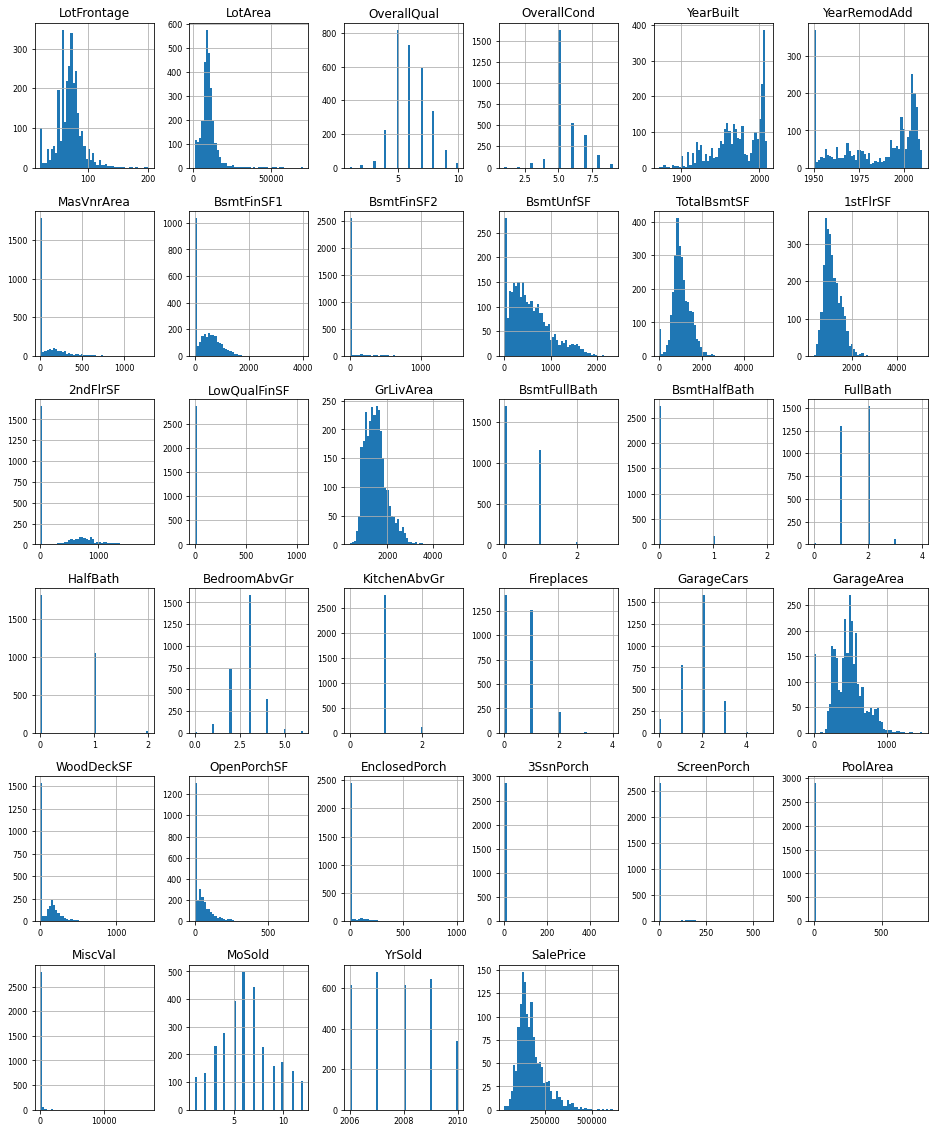

In [154]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [1]:
#Correlation heat map for numerical features
plt.figure(figsize=(18,16))
sns.heatmap(df_num.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap for numerical features');

NameError: name 'plt' is not defined

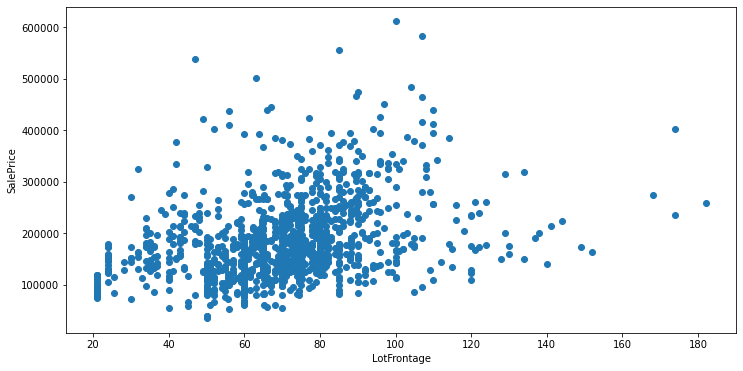

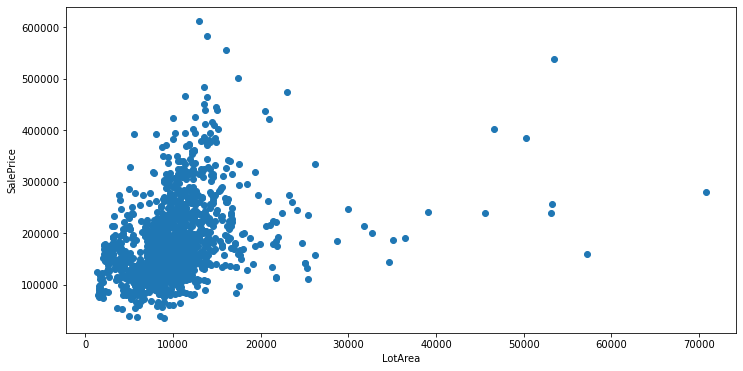

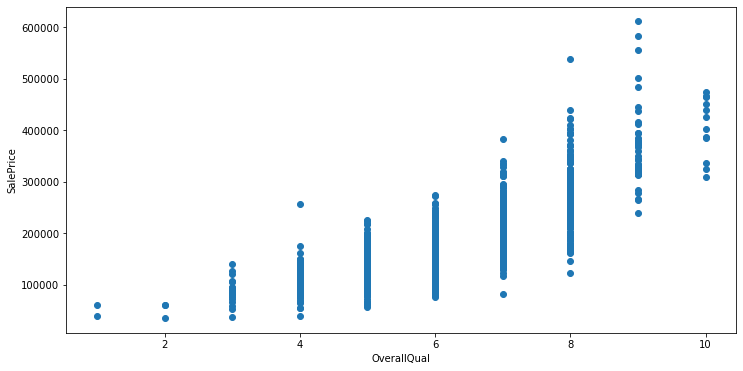

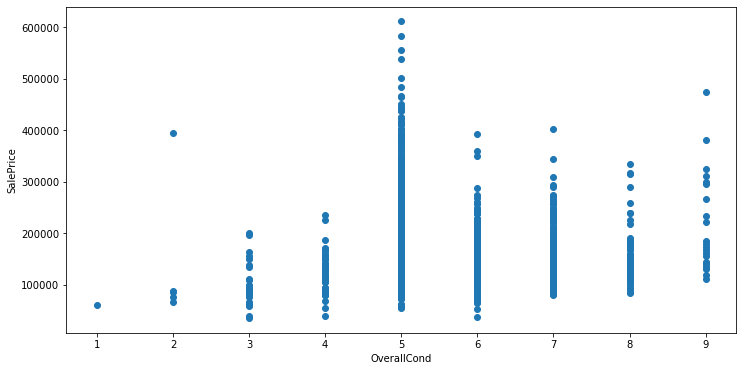

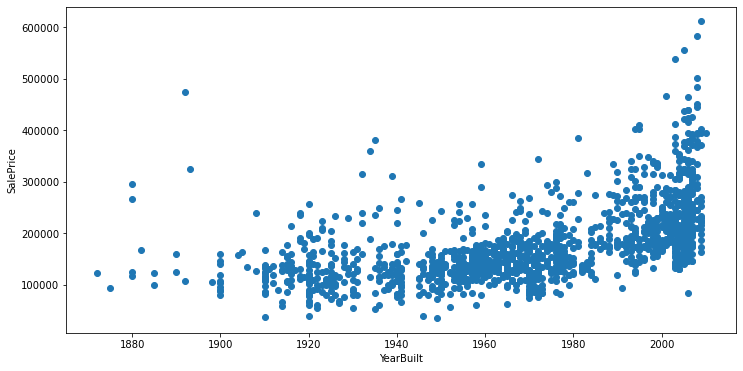

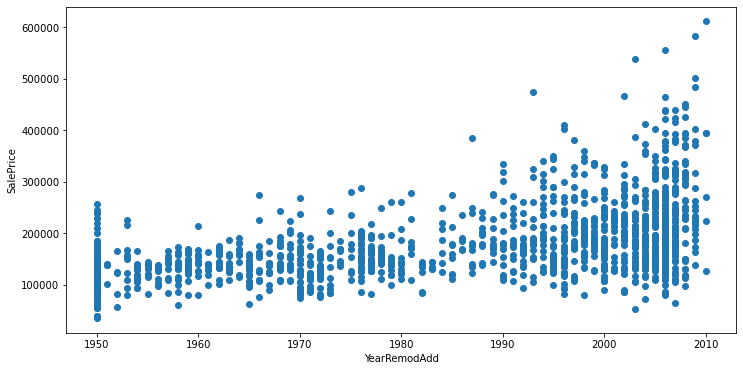

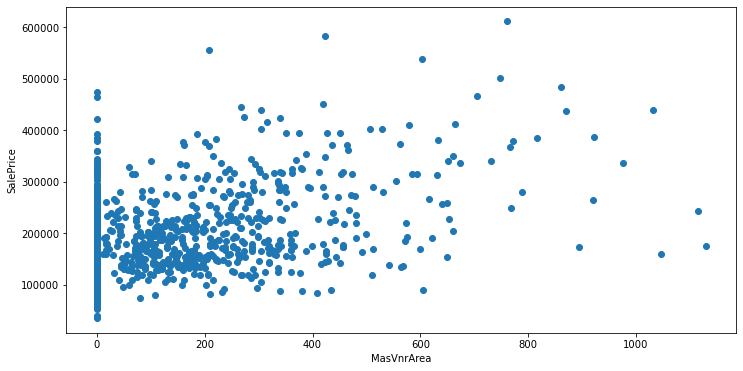

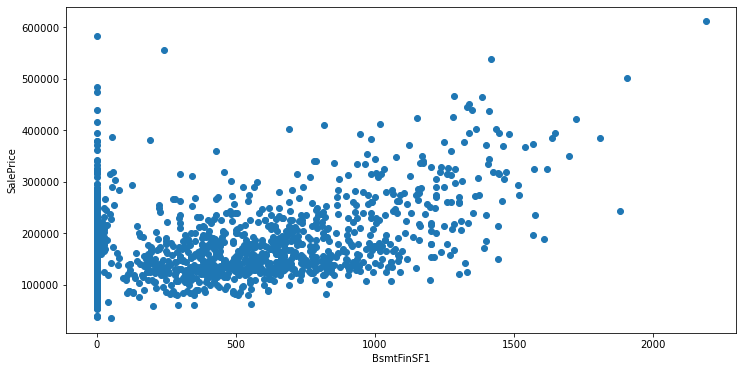

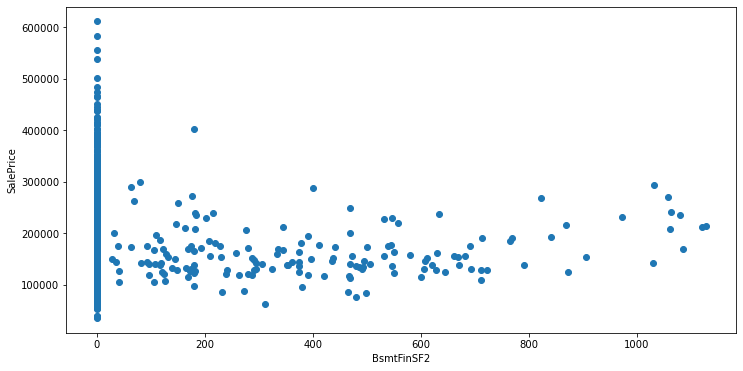

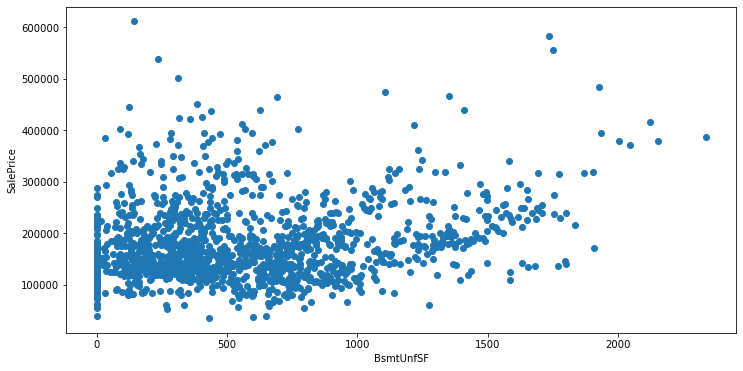

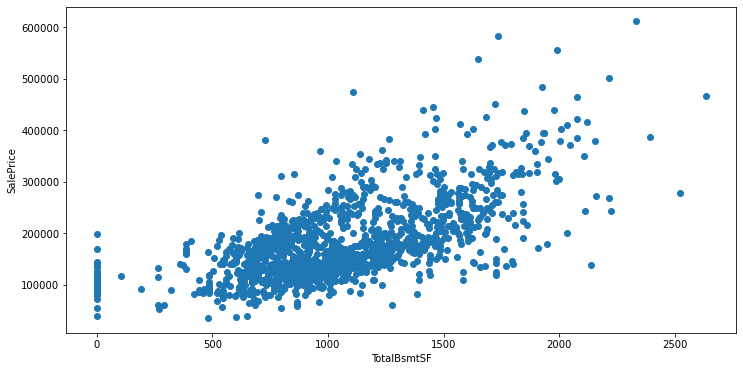

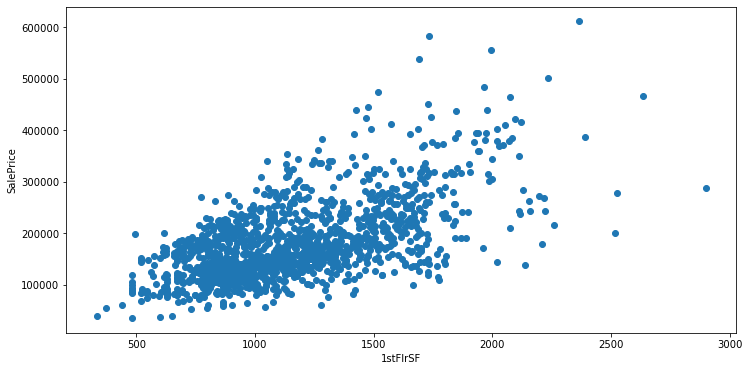

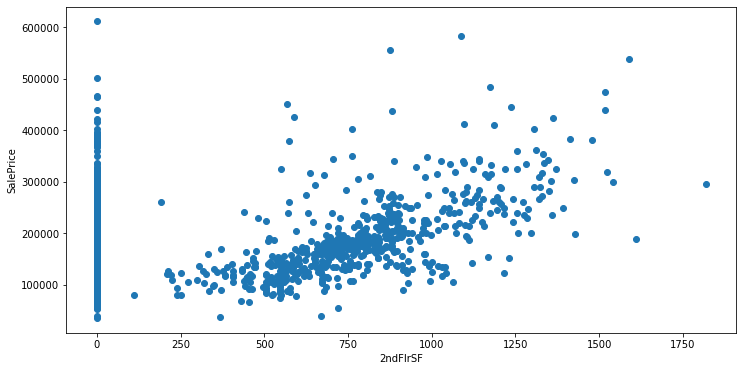

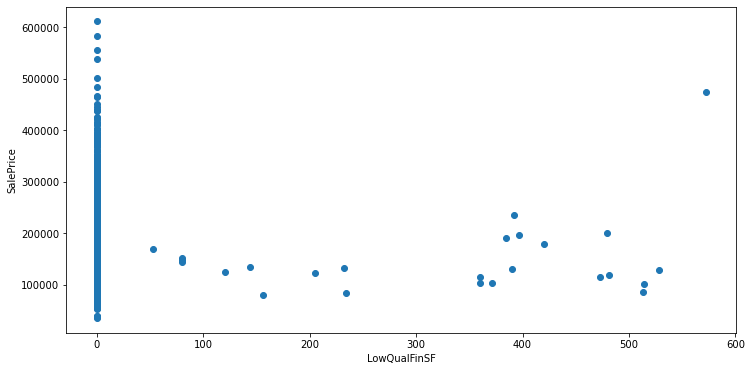

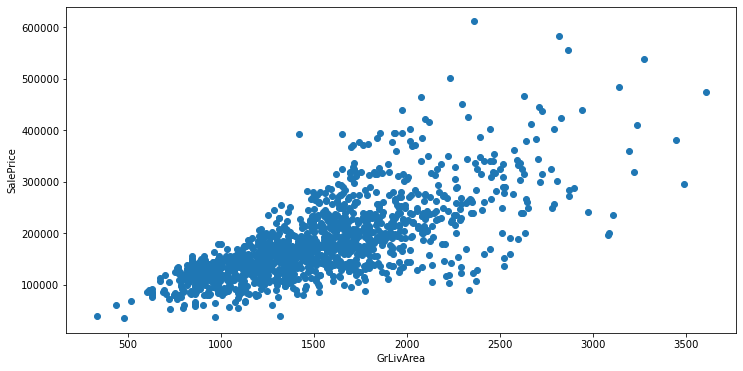

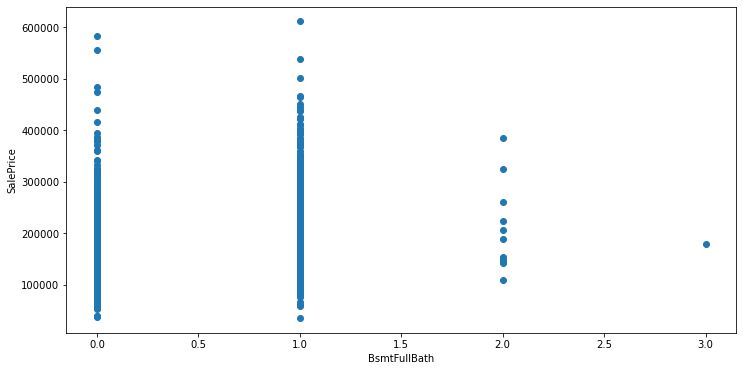

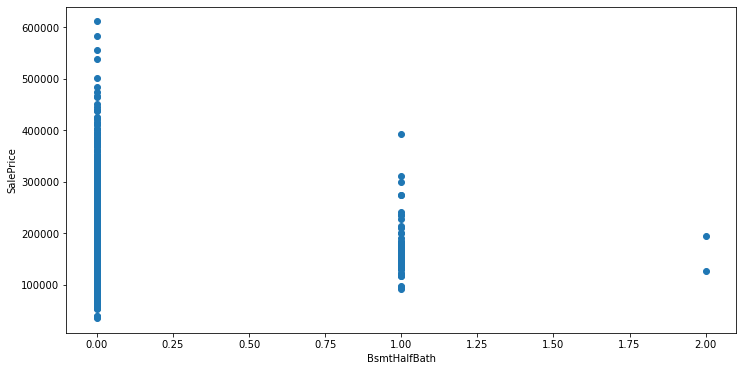

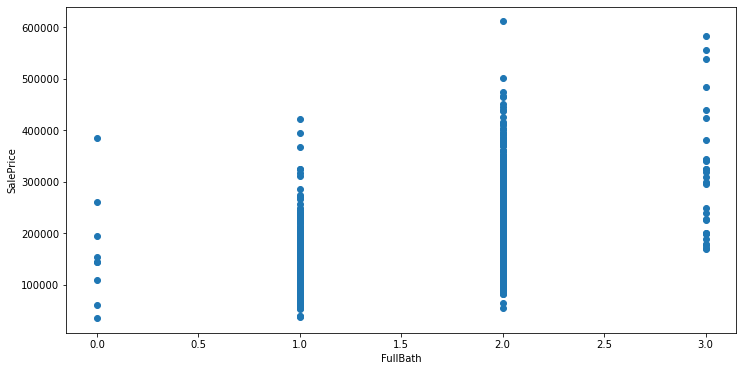

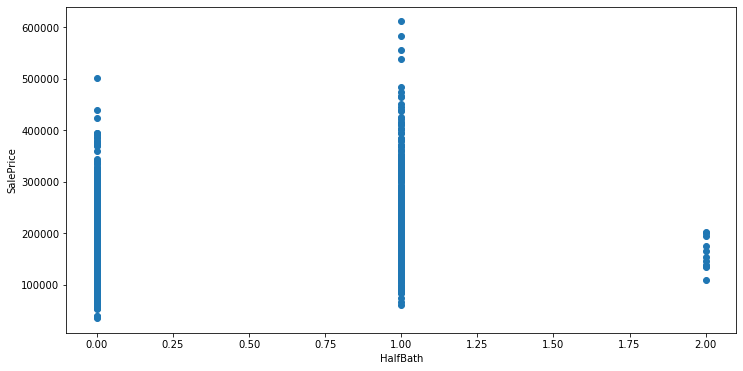

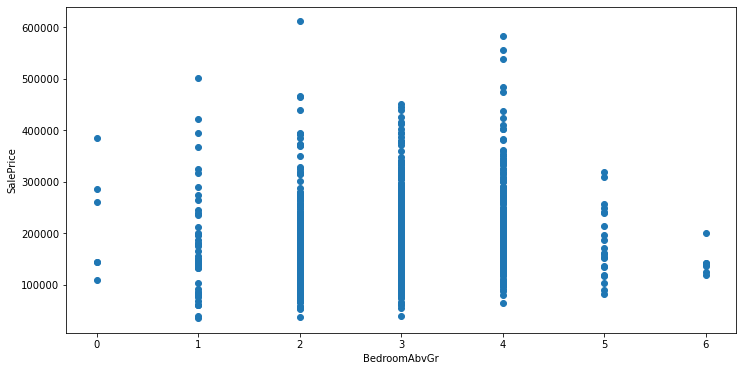

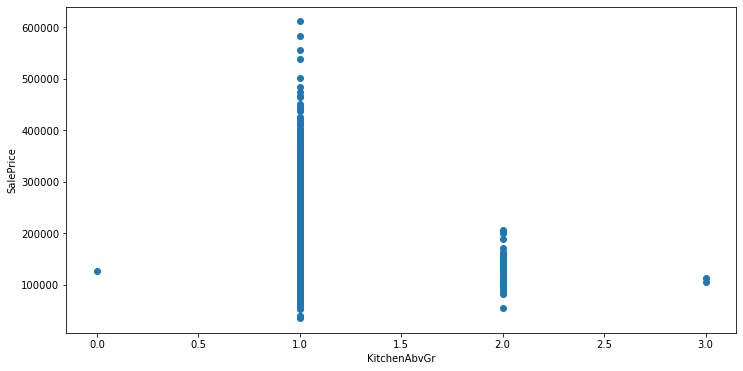

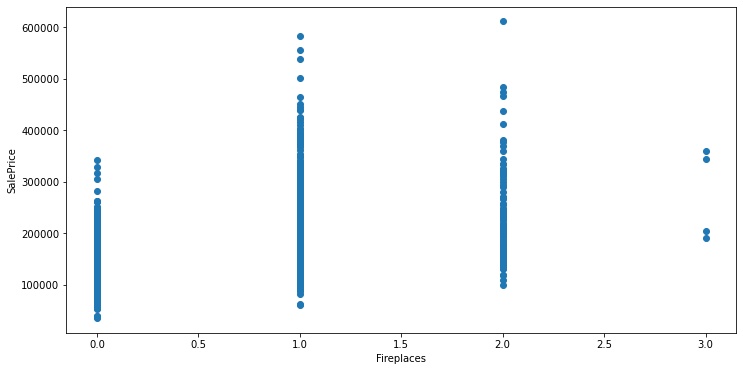

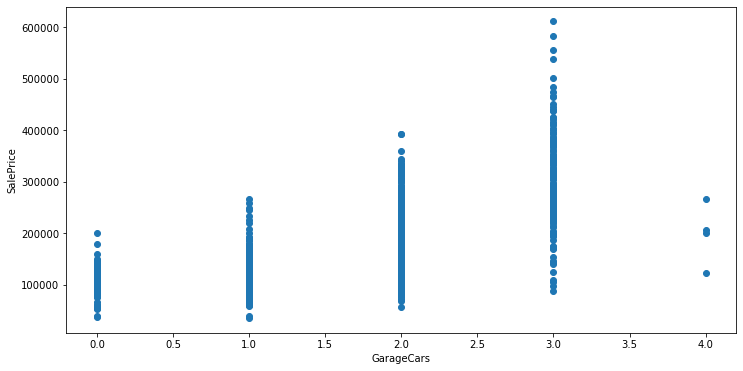

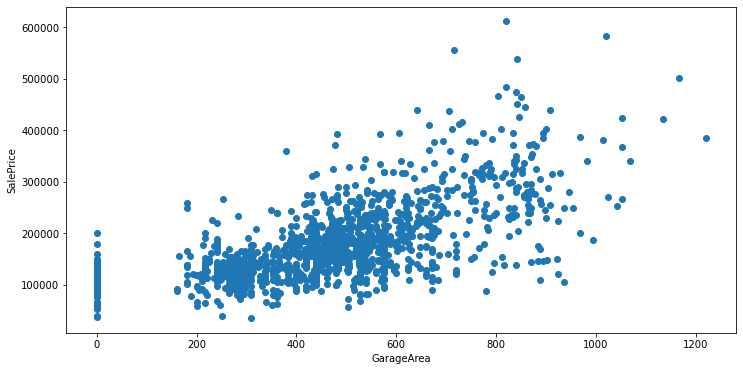

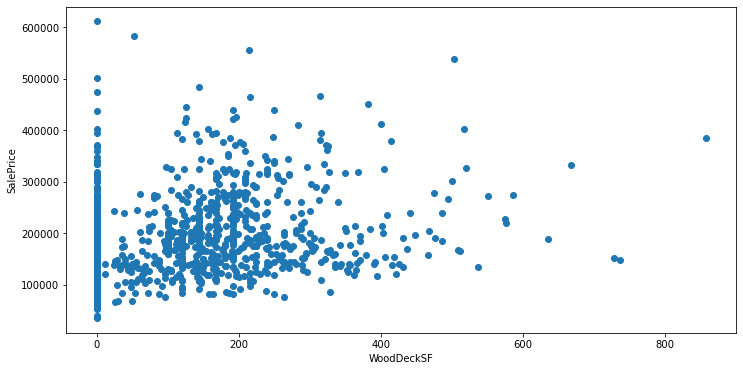

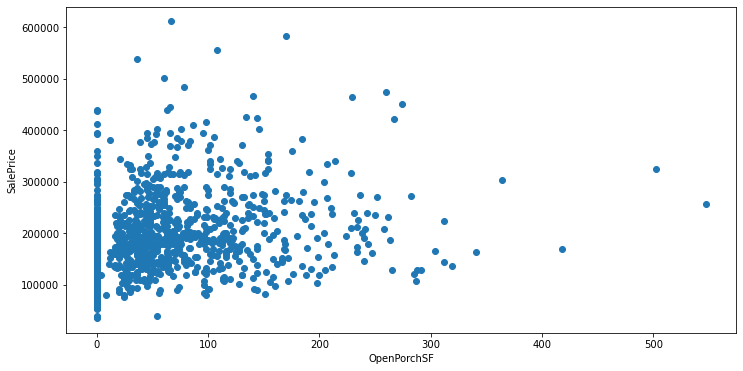

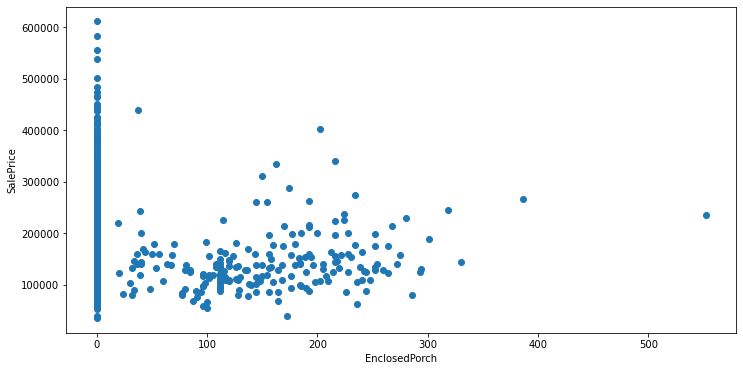

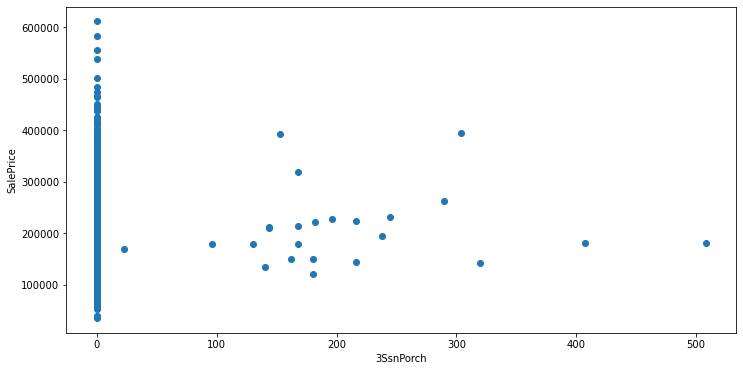

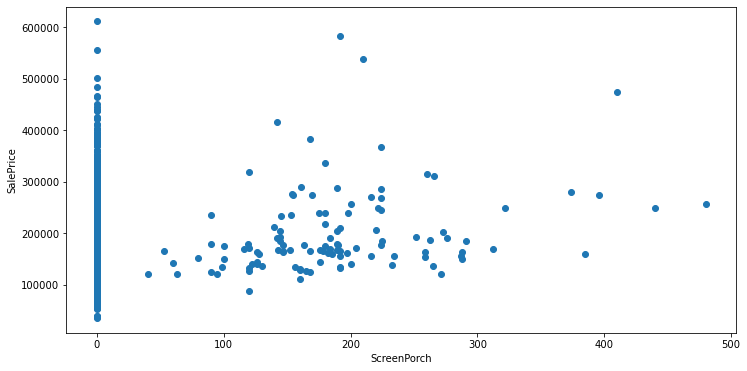

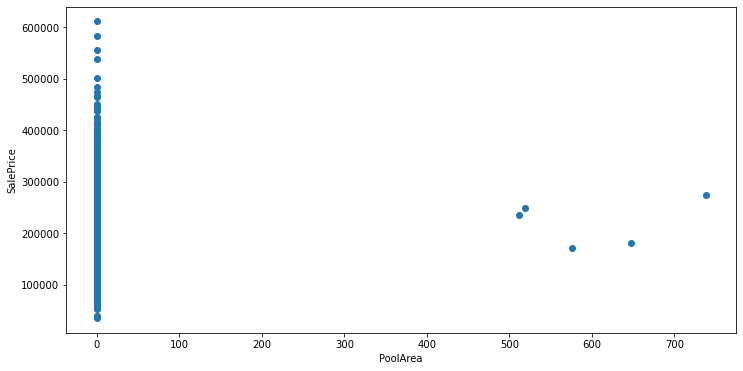

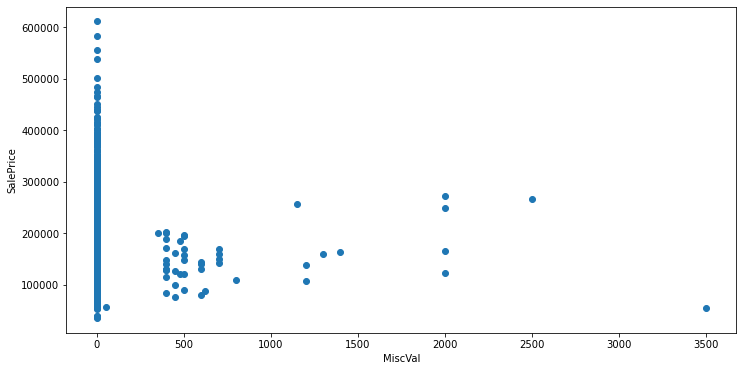

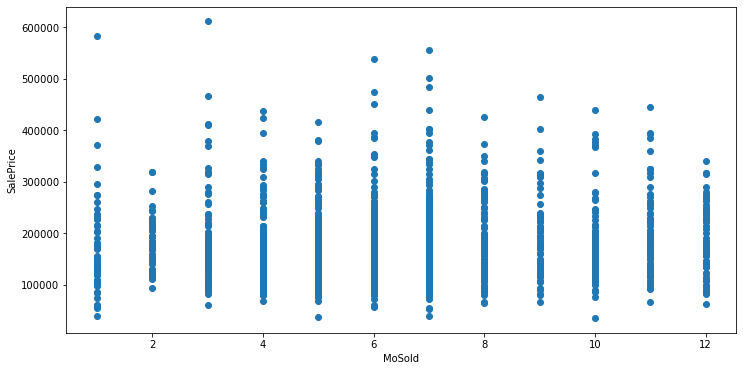

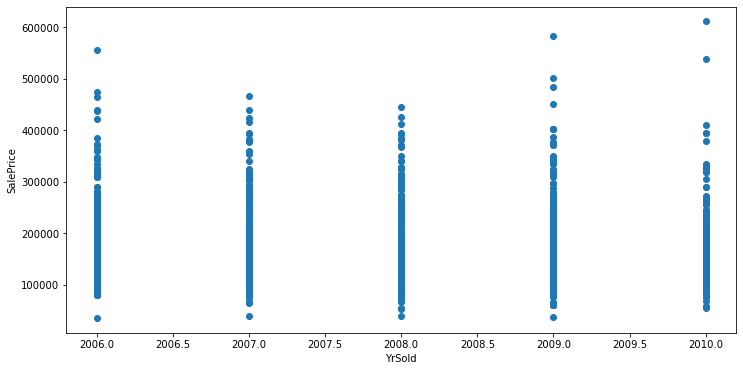

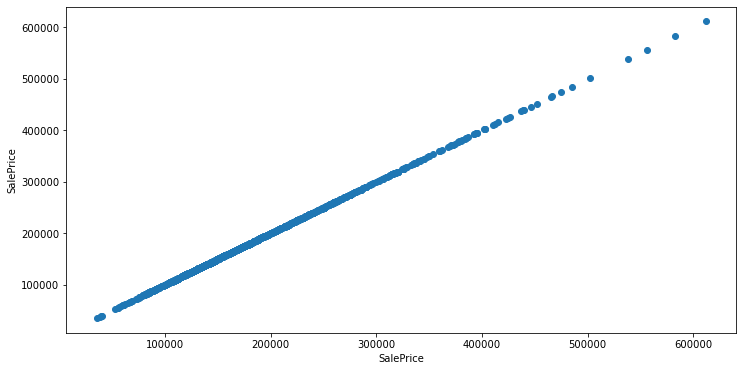

In [156]:
def plot_numeric_cols(df_2, cols):
    for col in cols:
        plt.figure(figsize=(12, 6))
        plt.xlabel(col)
        plt.ylabel('SalePrice')
        plt.scatter(df[col], df['SalePrice'])
        plt.show()
plot_numeric_cols(df_num, df_num.columns)

In [157]:
categorical_cols = df_2.select_dtypes(include=['object','category'])

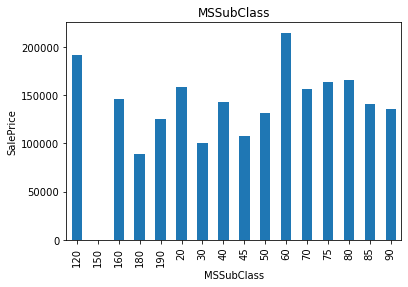

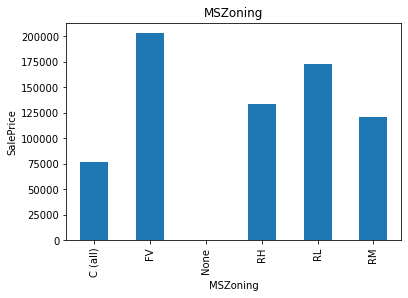

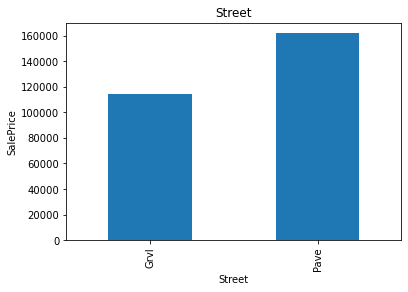

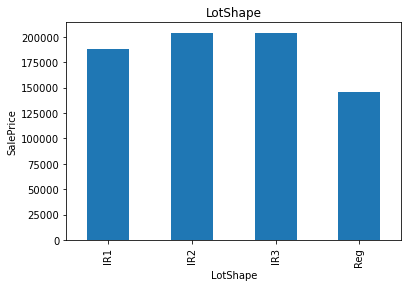

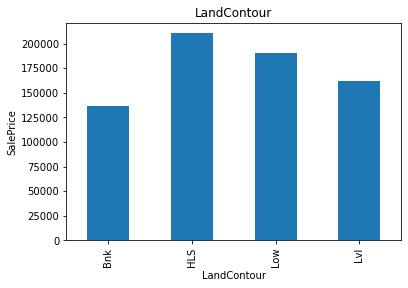

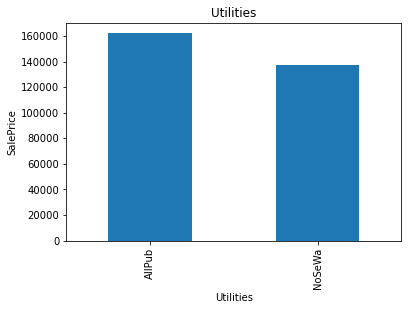

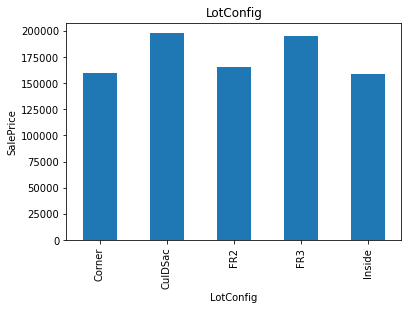

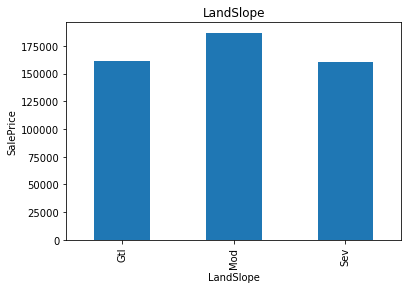

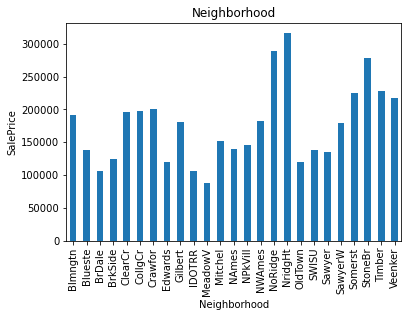

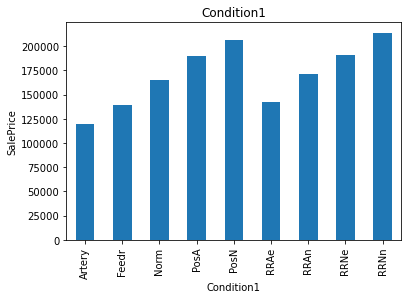

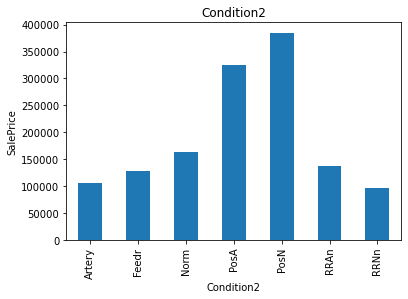

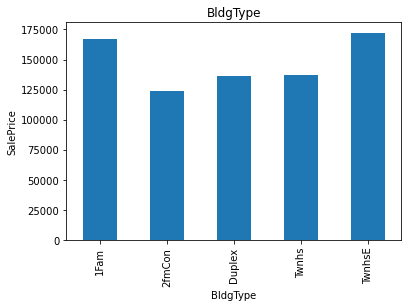

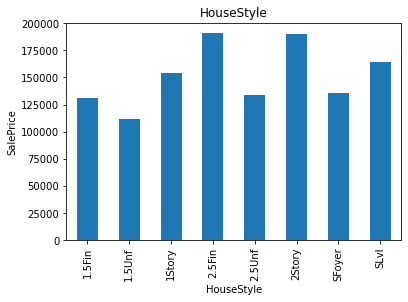

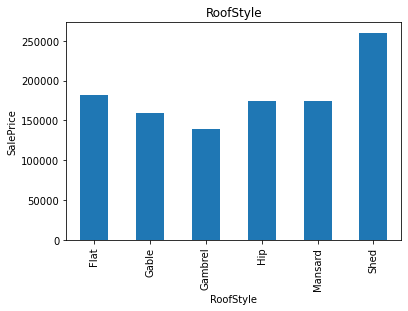

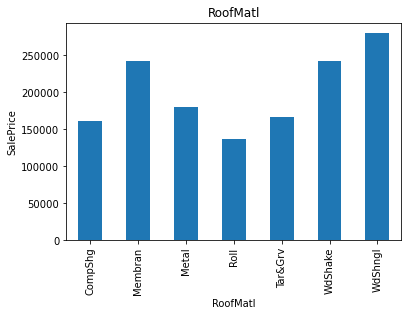

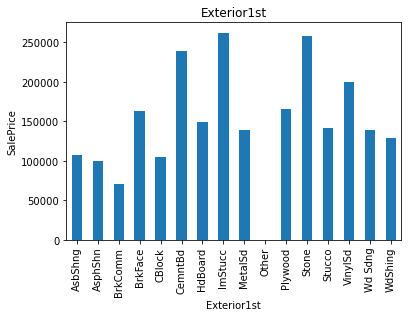

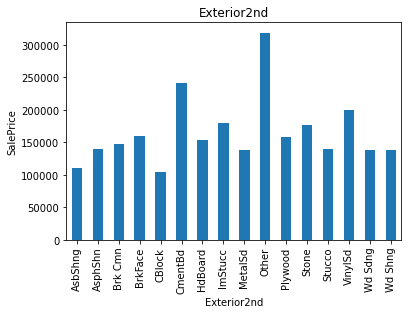

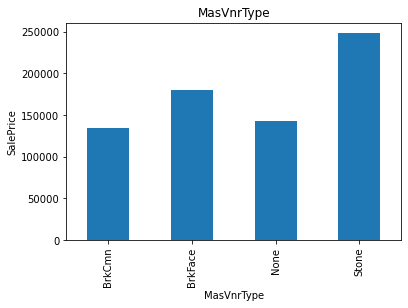

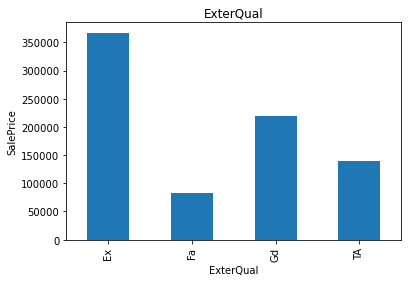

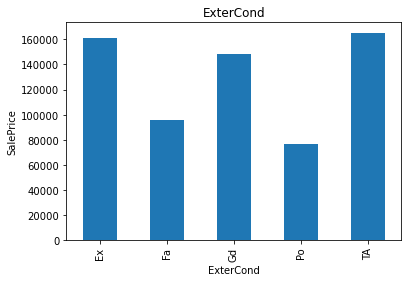

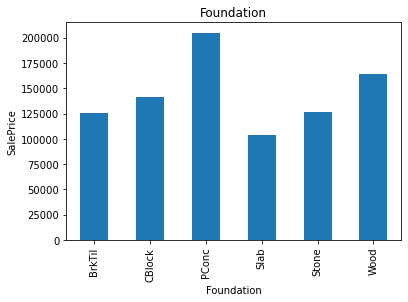

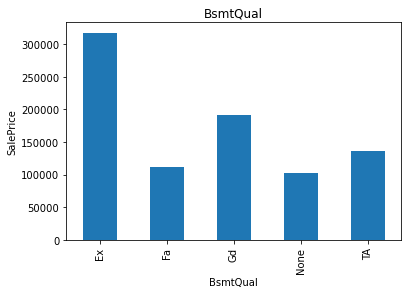

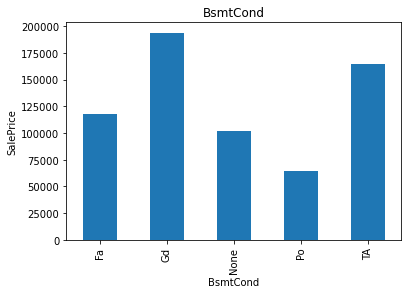

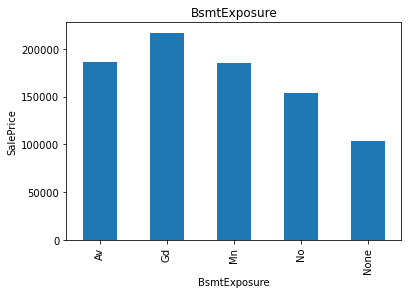

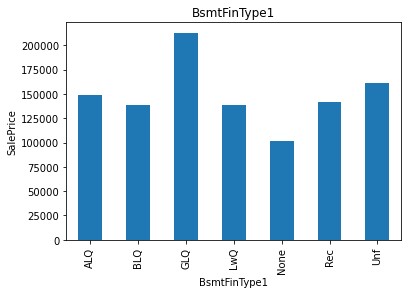

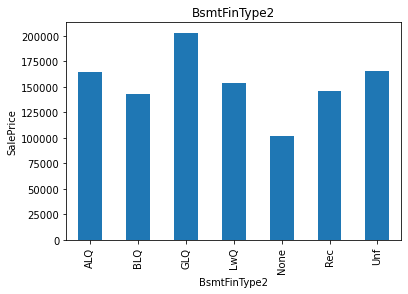

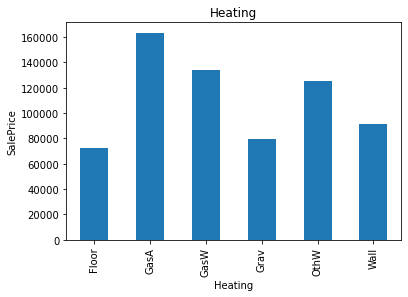

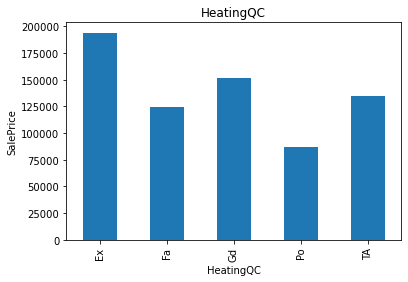

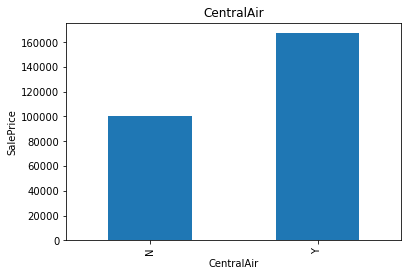

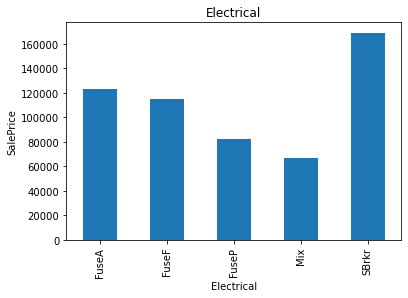

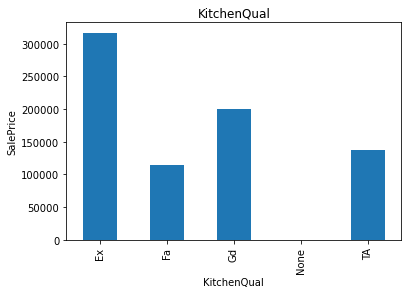

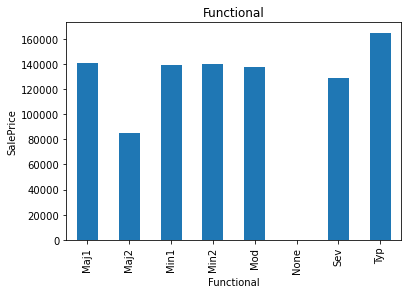

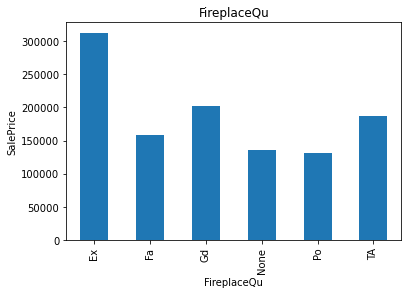

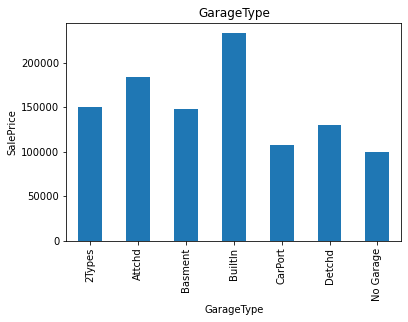

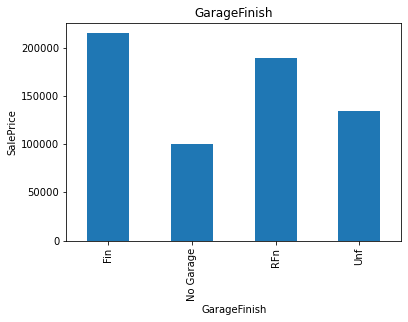

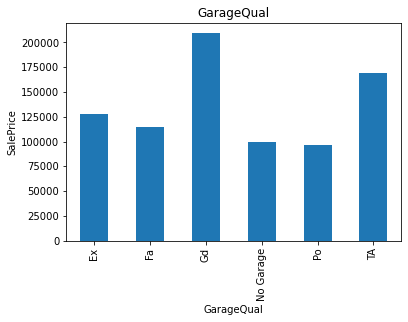

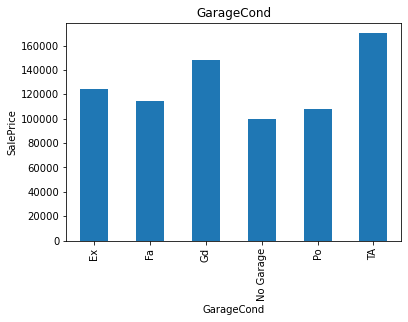

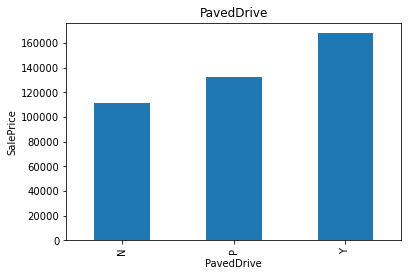

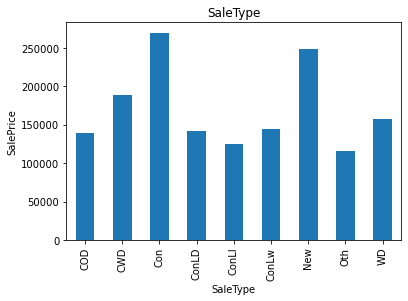

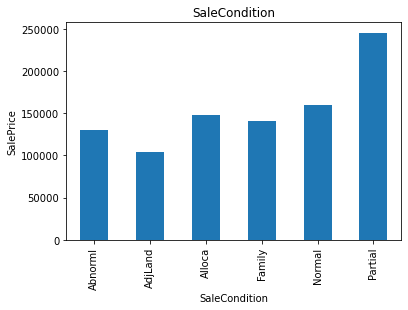

In [158]:
data = df_2.copy()
for col in categorical_cols:
    data.groupby(col)['SalePrice'].median().plot.bar()
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.title(col)
    plt.show()